### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import glob
import statsmodels.formula.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import numpy as np
import string
import re
import nltk
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from sklearn import preprocessing
import seaborn as sns
import scipy as sc
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,30)

[nltk_data] Downloading package wordnet to C:\Users\Ashish
[nltk_data]     Lakhmani\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Ashish
[nltk_data]     Lakhmani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### TWITTER SENTIMENT ANALYSIS

In [2]:
df = pd.read_csv('Boeing_New.csv',encoding='latin-1') #header=None, names=['Date_time', 'Tweets'])
#df['Date'] = df['Date_time']

In [3]:
df.head()

Date_Time        Date  \
0  2019-03-16 10:55:16  2019-03-16   
1  2019-03-16 10:55:16  2019-03-16   
2  2019-03-16 12:42:39  2019-03-16   
3  2019-03-16 12:42:39  2019-03-16   
4  2019-03-16 13:07:38  2019-03-16   

                                              Tweets  
0  J P Morgan Chase &amp; Co $JPM Market Value De...  
1  J P Morgan Chase &amp; Co $JPM Market Value De...  
2  (PREMIUM) Chart Of The Week: "Has BoeingÕs Sto...  
3  (PREMIUM) Chart Of The Week: "Has BoeingÕs Sto...  
4  I Took a Philosophy Class or 2 in College! I K...

In [4]:
df = df.drop(["Date_Time"], axis=1)

In [5]:
df.head()

Date                                             Tweets
0  2019-03-16  J P Morgan Chase &amp; Co $JPM Market Value De...
1  2019-03-16  J P Morgan Chase &amp; Co $JPM Market Value De...
2  2019-03-16  (PREMIUM) Chart Of The Week: "Has BoeingÕs Sto...
3  2019-03-16  (PREMIUM) Chart Of The Week: "Has BoeingÕs Sto...
4  2019-03-16  I Took a Philosophy Class or 2 in College! I K...

In [6]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
# Removing all punctuations
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', ' ', text)
    return text

df['Tweet_punct'] = df['Tweets'].apply(lambda x: remove_punct(x))
df.head(20)

Date                                             Tweets  \
0   2019-03-16  J P Morgan Chase &amp; Co $JPM Market Value De...   
1   2019-03-16  J P Morgan Chase &amp; Co $JPM Market Value De...   
2   2019-03-16  (PREMIUM) Chart Of The Week: "Has BoeingÕs Sto...   
3   2019-03-16  (PREMIUM) Chart Of The Week: "Has BoeingÕs Sto...   
4   2019-03-16  I Took a Philosophy Class or 2 in College! I K...   
5   2019-03-16  I Took a Philosophy Class or 2 in College! I K...   
6   2019-03-16  Due to recent Fallout from the Boeing 737 MAX ...   
7   2019-03-16  Due to recent Fallout from the Boeing 737 MAX ...   
8   2019-03-16  $BA ÒBoeing was going to have a software fix i...   
9   2019-03-16  $BA ÒBoeing was going to have a software fix i...   
10  2019-03-16  @mcm_ct Wow just found this out. The Hindenbur...   
11  2019-03-16  @mcm_ct Wow just found this out. The Hindenbur...   
12  2019-03-16  #TuesdayThoughts w. Corpina | Joins #TheVoz at...   
13  2019-03-16  #TuesdayThoughts w. Corpina | Joins #TheVoz at...   
14  2019-03-16  How things can sometimes go off the rails... $...   
15  2019-03-16  How things can sometimes go off the rails... $...   
16  2019-03-16  @traderstewie DonÕt worry it wonÕt stay.. prob...   
17  2019-03-16  @traderstewie DonÕt worry it wonÕt stay.. prob...   
18  2019-03-16  Commented on $BA - Boeing:?sht=pogp31&amp;shu=...   
19  2019-03-16  Commented on $BA - Boeing:?sht=pogp31&amp;shu=...   

                                          Tweet_punct  
0   J P Morgan Chase amp Co JPM Market Value Decli...  
1   J P Morgan Chase amp Co JPM Market Value Decli...  
2   PREMIUM Chart Of The Week Has BoeingÕs Stock B...  
3   PREMIUM Chart Of The Week Has BoeingÕs Stock B...  
4   I Took a Philosophy Class or   in College I Kn...  
5   I Took a Philosophy Class or   in College I Kn...  
6   Due to recent Fallout from the Boeing   MAX   ...  
7   Due to recent Fallout from the Boeing   MAX   ...  
8   BA ÒBoeing was going to have a software fix in...  
9   BA ÒBoeing was going to have a software fix in...  
10  mcmct Wow just found this out The Hindenburg d...  
11  mcmct Wow just found this out The Hindenburg d...  
12  TuesdayThoughts w Corpina  Joins TheVoz at NYS...  
13  TuesdayThoughts w Corpina  Joins TheVoz at NYS...  
14  How things can sometimes go off the rails ROKU...  
15  How things can sometimes go off the rails ROKU...  
16  traderstewie DonÕt worry it wonÕt stay problem...  
17  traderstewie DonÕt worry it wonÕt stay problem...  
18  Commented on BA  Boeingshtpogp ampshu yg  Huge...  
19  Commented on BA  Boeingshtpogp ampshu yg  Huge...

In [8]:
# removing newline or \n expressions.
df["Tweet_nonewline"] = [tweet.replace('\n'," ").strip() for tweet in df["Tweet_punct"]]
df.head(20)

Date                                             Tweets  \
0   2019-03-16  J P Morgan Chase &amp; Co $JPM Market Value De...   
1   2019-03-16  J P Morgan Chase &amp; Co $JPM Market Value De...   
2   2019-03-16  (PREMIUM) Chart Of The Week: "Has BoeingÕs Sto...   
3   2019-03-16  (PREMIUM) Chart Of The Week: "Has BoeingÕs Sto...   
4   2019-03-16  I Took a Philosophy Class or 2 in College! I K...   
5   2019-03-16  I Took a Philosophy Class or 2 in College! I K...   
6   2019-03-16  Due to recent Fallout from the Boeing 737 MAX ...   
7   2019-03-16  Due to recent Fallout from the Boeing 737 MAX ...   
8   2019-03-16  $BA ÒBoeing was going to have a software fix i...   
9   2019-03-16  $BA ÒBoeing was going to have a software fix i...   
10  2019-03-16  @mcm_ct Wow just found this out. The Hindenbur...   
11  2019-03-16  @mcm_ct Wow just found this out. The Hindenbur...   
12  2019-03-16  #TuesdayThoughts w. Corpina | Joins #TheVoz at...   
13  2019-03-16  #TuesdayThoughts w. Corpina | Joins #TheVoz at...   
14  2019-03-16  How things can sometimes go off the rails... $...   
15  2019-03-16  How things can sometimes go off the rails... $...   
16  2019-03-16  @traderstewie DonÕt worry it wonÕt stay.. prob...   
17  2019-03-16  @traderstewie DonÕt worry it wonÕt stay.. prob...   
18  2019-03-16  Commented on $BA - Boeing:?sht=pogp31&amp;shu=...   
19  2019-03-16  Commented on $BA - Boeing:?sht=pogp31&amp;shu=...   

                                          Tweet_punct  \
0   J P Morgan Chase amp Co JPM Market Value Decli...   
1   J P Morgan Chase amp Co JPM Market Value Decli...   
2   PREMIUM Chart Of The Week Has BoeingÕs Stock B...   
3   PREMIUM Chart Of The Week Has BoeingÕs Stock B...   
4   I Took a Philosophy Class or   in College I Kn...   
5   I Took a Philosophy Class or   in College I Kn...   
6   Due to recent Fallout from the Boeing   MAX   ...   
7   Due to recent Fallout from the Boeing   MAX   ...   
8   BA ÒBoeing was going to have a software fix in...   
9   BA ÒBoeing was going to have a software fix in...   
10  mcmct Wow just found this out The Hindenburg d...   
11  mcmct Wow just found this out The Hindenburg d...   
12  TuesdayThoughts w Corpina  Joins TheVoz at NYS...   
13  TuesdayThoughts w Corpina  Joins TheVoz at NYS...   
14  How things can sometimes go off the rails ROKU...   
15  How things can sometimes go off the rails ROKU...   
16  traderstewie DonÕt worry it wonÕt stay problem...   
17  traderstewie DonÕt worry it wonÕt stay problem...   
18  Commented on BA  Boeingshtpogp ampshu yg  Huge...   
19  Commented on BA  Boeingshtpogp ampshu yg  Huge...   

                                      Tweet_nonewline  
0   J P Morgan Chase amp Co JPM Market Value Decli...  
1   J P Morgan Chase amp Co JPM Market Value Decli...  
2   PREMIUM Chart Of The Week Has BoeingÕs Stock B...  
3   PREMIUM Chart Of The Week Has BoeingÕs Stock B...  
4   I Took a Philosophy Class or   in College I Kn...  
5   I Took a Philosophy Class or   in College I Kn...  
6   Due to recent Fallout from the Boeing   MAX   ...  
7   Due to recent Fallout from the Boeing   MAX   ...  
8   BA ÒBoeing was going to have a software fix in...  
9   BA ÒBoeing was going to have a software fix in...  
10  mcmct Wow just found this out The Hindenburg d...  
11  mcmct Wow just found this out The Hindenburg d...  
12  TuesdayThoughts w Corpina  Joins TheVoz at NYS...  
13  TuesdayThoughts w Corpina  Joins TheVoz at NYS...  
14  How things can sometimes go off the rails ROKU...  
15  How things can sometimes go off the rails ROKU...  
16  traderstewie DonÕt worry it wonÕt stay problem...  
17  traderstewie DonÕt worry it wonÕt stay problem...  
18  Commented on BA  Boeingshtpogp ampshu yg  Huge...  
19  Commented on BA  Boeingshtpogp ampshu yg  Huge...

In [9]:
# Removing http url from every tweet substitued with space
df["Tweet_wohttp"] = [re.sub(r"http\S+", " ", text) for text in df["Tweet_nonewline"]]
df.head()

Date                                             Tweets  \
0  2019-03-16  J P Morgan Chase &amp; Co $JPM Market Value De...   
1  2019-03-16  J P Morgan Chase &amp; Co $JPM Market Value De...   
2  2019-03-16  (PREMIUM) Chart Of The Week: "Has BoeingÕs Sto...   
3  2019-03-16  (PREMIUM) Chart Of The Week: "Has BoeingÕs Sto...   
4  2019-03-16  I Took a Philosophy Class or 2 in College! I K...   

                                         Tweet_punct  \
0  J P Morgan Chase amp Co JPM Market Value Decli...   
1  J P Morgan Chase amp Co JPM Market Value Decli...   
2  PREMIUM Chart Of The Week Has BoeingÕs Stock B...   
3  PREMIUM Chart Of The Week Has BoeingÕs Stock B...   
4  I Took a Philosophy Class or   in College I Kn...   

                                     Tweet_nonewline  \
0  J P Morgan Chase amp Co JPM Market Value Decli...   
1  J P Morgan Chase amp Co JPM Market Value Decli...   
2  PREMIUM Chart Of The Week Has BoeingÕs Stock B...   
3  PREMIUM Chart Of The Week Has BoeingÕs Stock B...   
4  I Took a Philosophy Class or   in College I Kn...   

                                        Tweet_wohttp  
0  J P Morgan Chase amp Co JPM Market Value Decli...  
1  J P Morgan Chase amp Co JPM Market Value Decli...  
2  PREMIUM Chart Of The Week Has BoeingÕs Stock B...  
3  PREMIUM Chart Of The Week Has BoeingÕs Stock B...  
4  I Took a Philosophy Class or   in College I Kn...

In [10]:
# Removing numbers
df["Tweet_nonum"] = [re.sub("\d+", " ", text) for text in df["Tweet_wohttp"]]
df.head(20)

Date                                             Tweets  \
0   2019-03-16  J P Morgan Chase &amp; Co $JPM Market Value De...   
1   2019-03-16  J P Morgan Chase &amp; Co $JPM Market Value De...   
2   2019-03-16  (PREMIUM) Chart Of The Week: "Has BoeingÕs Sto...   
3   2019-03-16  (PREMIUM) Chart Of The Week: "Has BoeingÕs Sto...   
4   2019-03-16  I Took a Philosophy Class or 2 in College! I K...   
5   2019-03-16  I Took a Philosophy Class or 2 in College! I K...   
6   2019-03-16  Due to recent Fallout from the Boeing 737 MAX ...   
7   2019-03-16  Due to recent Fallout from the Boeing 737 MAX ...   
8   2019-03-16  $BA ÒBoeing was going to have a software fix i...   
9   2019-03-16  $BA ÒBoeing was going to have a software fix i...   
10  2019-03-16  @mcm_ct Wow just found this out. The Hindenbur...   
11  2019-03-16  @mcm_ct Wow just found this out. The Hindenbur...   
12  2019-03-16  #TuesdayThoughts w. Corpina | Joins #TheVoz at...   
13  2019-03-16  #TuesdayThoughts w. Corpina | Joins #TheVoz at...   
14  2019-03-16  How things can sometimes go off the rails... $...   
15  2019-03-16  How things can sometimes go off the rails... $...   
16  2019-03-16  @traderstewie DonÕt worry it wonÕt stay.. prob...   
17  2019-03-16  @traderstewie DonÕt worry it wonÕt stay.. prob...   
18  2019-03-16  Commented on $BA - Boeing:?sht=pogp31&amp;shu=...   
19  2019-03-16  Commented on $BA - Boeing:?sht=pogp31&amp;shu=...   

                                          Tweet_punct  \
0   J P Morgan Chase amp Co JPM Market Value Decli...   
1   J P Morgan Chase amp Co JPM Market Value Decli...   
2   PREMIUM Chart Of The Week Has BoeingÕs Stock B...   
3   PREMIUM Chart Of The Week Has BoeingÕs Stock B...   
4   I Took a Philosophy Class or   in College I Kn...   
5   I Took a Philosophy Class or   in College I Kn...   
6   Due to recent Fallout from the Boeing   MAX   ...   
7   Due to recent Fallout from the Boeing   MAX   ...   
8   BA ÒBoeing was going to have a software fix in...   
9   BA ÒBoeing was going to have a software fix in...   
10  mcmct Wow just found this out The Hindenburg d...   
11  mcmct Wow just found this out The Hindenburg d...   
12  TuesdayThoughts w Corpina  Joins TheVoz at NYS...   
13  TuesdayThoughts w Corpina  Joins TheVoz at NYS...   
14  How things can sometimes go off the rails ROKU...   
15  How things can sometimes go off the rails ROKU...   
16  traderstewie DonÕt worry it wonÕt stay problem...   
17  traderstewie DonÕt worry it wonÕt stay problem...   
18  Commented on BA  Boeingshtpogp ampshu yg  Huge...   
19  Commented on BA  Boeingshtpogp ampshu yg  Huge...   

                                      Tweet_nonewline  \
0   J P Morgan Chase amp Co JPM Market Value Decli...   
1   J P Morgan Chase amp Co JPM Market Value Decli...   
2   PREMIUM Chart Of The Week Has BoeingÕs Stock B...   
3   PREMIUM Chart Of The Week Has BoeingÕs Stock B...   
4   I Took a Philosophy Class or   in College I Kn...   
5   I Took a Philosophy Class or   in College I Kn...   
6   Due to recent Fallout from the Boeing   MAX   ...   
7   Due to recent Fallout from the Boeing   MAX   ...   
8   BA ÒBoeing was going to have a software fix in...   
9   BA ÒBoeing was going to have a software fix in...   
10  mcmct Wow just found this out The Hindenburg d...   
11  mcmct Wow just found this out The Hindenburg d...   
12  TuesdayThoughts w Corpina  Joins TheVoz at NYS...   
13  TuesdayThoughts w Corpina  Joins TheVoz at NYS...   
14  How things can sometimes go off the rails ROKU...   
15  How things can sometimes go off the rails ROKU...   
16  traderstewie DonÕt worry it wonÕt stay problem...   
17  traderstewie DonÕt worry it wonÕt stay problem...   
18  Commented on BA  Boeingshtpogp ampshu yg  Huge...   
19  Commented on BA  Boeingshtpogp ampshu yg  Huge...   

                                         Tweet_wohttp  \
0   J P Morgan Chase amp Co JPM Market Value Decli...   
1   J P Morgan Chase amp Co JPM Market Value Decli

In [11]:
#Removing ASCII values
df["Tweet_noascii"] = [re.sub(r'[^\x00-\x7F]+',' ', text) for text in df["Tweet_nonum"]]
df.head()

Date                                             Tweets  \
0  2019-03-16  J P Morgan Chase &amp; Co $JPM Market Value De...   
1  2019-03-16  J P Morgan Chase &amp; Co $JPM Market Value De...   
2  2019-03-16  (PREMIUM) Chart Of The Week: "Has BoeingÕs Sto...   
3  2019-03-16  (PREMIUM) Chart Of The Week: "Has BoeingÕs Sto...   
4  2019-03-16  I Took a Philosophy Class or 2 in College! I K...   

                                         Tweet_punct  \
0  J P Morgan Chase amp Co JPM Market Value Decli...   
1  J P Morgan Chase amp Co JPM Market Value Decli...   
2  PREMIUM Chart Of The Week Has BoeingÕs Stock B...   
3  PREMIUM Chart Of The Week Has BoeingÕs Stock B...   
4  I Took a Philosophy Class or   in College I Kn...   

                                     Tweet_nonewline  \
0  J P Morgan Chase amp Co JPM Market Value Decli...   
1  J P Morgan Chase amp Co JPM Market Value Decli...   
2  PREMIUM Chart Of The Week Has BoeingÕs Stock B...   
3  PREMIUM Chart Of The Week Has BoeingÕs Stock B...   
4  I Took a Philosophy Class or   in College I Kn...   

                                        Tweet_wohttp  \
0  J P Morgan Chase amp Co JPM Market Value Decli...   
1  J P Morgan Chase amp Co JPM Market Value Decli...   
2  PREMIUM Chart Of The Week Has BoeingÕs Stock B...   
3  PREMIUM Chart Of The Week Has BoeingÕs Stock B...   
4  I Took a Philosophy Class or   in College I Kn...   

                                         Tweet_nonum  \
0  J P Morgan Chase amp Co JPM Market Value Decli...   
1  J P Morgan Chase amp Co JPM Market Value Decli...   
2  PREMIUM Chart Of The Week Has BoeingÕs Stock B...   
3  PREMIUM Chart Of The Week Has BoeingÕs Stock B...   
4  I Took a Philosophy Class or   in College I Kn...   

                                       Tweet_noascii  
0  J P Morgan Chase amp Co JPM Market Value Decli...  
1  J P Morgan Chase amp Co JPM Market Value Decli...  
2  PREMIUM Chart Of The Week Has Boeing s Stock B...  
3  PREMIUM Chart Of The Week Has Boeing s Stock B...  
4  I Took a Philosophy Class or   in College I Kn...

In [12]:
# Applying Tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['Tweet_tokenized'] = df['Tweet_noascii'].apply(lambda x: tokenization(x.lower()))
df.head()

Date                                             Tweets  \
0  2019-03-16  J P Morgan Chase &amp; Co $JPM Market Value De...   
1  2019-03-16  J P Morgan Chase &amp; Co $JPM Market Value De...   
2  2019-03-16  (PREMIUM) Chart Of The Week: "Has BoeingÕs Sto...   
3  2019-03-16  (PREMIUM) Chart Of The Week: "Has BoeingÕs Sto...   
4  2019-03-16  I Took a Philosophy Class or 2 in College! I K...   

                                         Tweet_punct  \
0  J P Morgan Chase amp Co JPM Market Value Decli...   
1  J P Morgan Chase amp Co JPM Market Value Decli...   
2  PREMIUM Chart Of The Week Has BoeingÕs Stock B...   
3  PREMIUM Chart Of The Week Has BoeingÕs Stock B...   
4  I Took a Philosophy Class or   in College I Kn...   

                                     Tweet_nonewline  \
0  J P Morgan Chase amp Co JPM Market Value Decli...   
1  J P Morgan Chase amp Co JPM Market Value Decli...   
2  PREMIUM Chart Of The Week Has BoeingÕs Stock B...   
3  PREMIUM Chart Of The Week Has BoeingÕs Stock B...   
4  I Took a Philosophy Class or   in College I Kn...   

                                        Tweet_wohttp  \
0  J P Morgan Chase amp Co JPM Market Value Decli...   
1  J P Morgan Chase amp Co JPM Market Value Decli...   
2  PREMIUM Chart Of The Week Has BoeingÕs Stock B...   
3  PREMIUM Chart Of The Week Has BoeingÕs Stock B...   
4  I Took a Philosophy Class or   in College I Kn...   

                                         Tweet_nonum  \
0  J P Morgan Chase amp Co JPM Market Value Decli...   
1  J P Morgan Chase amp Co JPM Market Value Decli...   
2  PREMIUM Chart Of The Week Has BoeingÕs Stock B...   
3  PREMIUM Chart Of The Week Has BoeingÕs Stock B...   
4  I Took a Philosophy Class or   in College I Kn...   

                                       Tweet_noascii  \
0  J P Morgan Chase amp Co JPM Market Value Decli...   
1  J P Morgan Chase amp Co JPM Market Value Decli...   
2  PREMIUM Chart Of The Week Has Boeing s Stock B...   
3  PREMIUM Chart Of The Week Has Boeing s Stock B...   
4  I Took a Philosophy Class or   in College I Kn...   

                                     Tweet_tokenized  
0  [j, p, morgan, chase, amp, co, jpm, market, va...  
1  [j, p, morgan, chase, amp, co, jpm, market, va...  
2  [premium, chart, of, the, week, has, boeing, s...  
3  [premium, chart, of, the, week, has, boeing, s...  
4  [i, took, a, philosophy, class, or, in, colleg...

In [13]:
# Applying Lemmatizer
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word, pos="v") for word in text]
    return text

df['Tweet_lemmatized'] = df['Tweet_tokenized'].apply(lambda x: lemmatizer(x))
df.head()

Date                                             Tweets  \
0  2019-03-16  J P Morgan Chase &amp; Co $JPM Market Value De...   
1  2019-03-16  J P Morgan Chase &amp; Co $JPM Market Value De...   
2  2019-03-16  (PREMIUM) Chart Of The Week: "Has BoeingÕs Sto...   
3  2019-03-16  (PREMIUM) Chart Of The Week: "Has BoeingÕs Sto...   
4  2019-03-16  I Took a Philosophy Class or 2 in College! I K...   

                                         Tweet_punct  \
0  J P Morgan Chase amp Co JPM Market Value Decli...   
1  J P Morgan Chase amp Co JPM Market Value Decli...   
2  PREMIUM Chart Of The Week Has BoeingÕs Stock B...   
3  PREMIUM Chart Of The Week Has BoeingÕs Stock B...   
4  I Took a Philosophy Class or   in College I Kn...   

                                     Tweet_nonewline  \
0  J P Morgan Chase amp Co JPM Market Value Decli...   
1  J P Morgan Chase amp Co JPM Market Value Decli...   
2  PREMIUM Chart Of The Week Has BoeingÕs Stock B...   
3  PREMIUM Chart Of The Week Has BoeingÕs Stock B...   
4  I Took a Philosophy Class or   in College I Kn...   

                                        Tweet_wohttp  \
0  J P Morgan Chase amp Co JPM Market Value Decli...   
1  J P Morgan Chase amp Co JPM Market Value Decli...   
2  PREMIUM Chart Of The Week Has BoeingÕs Stock B...   
3  PREMIUM Chart Of The Week Has BoeingÕs Stock B...   
4  I Took a Philosophy Class or   in College I Kn...   

                                         Tweet_nonum  \
0  J P Morgan Chase amp Co JPM Market Value Decli...   
1  J P Morgan Chase amp Co JPM Market Value Decli...   
2  PREMIUM Chart Of The Week Has BoeingÕs Stock B...   
3  PREMIUM Chart Of The Week Has BoeingÕs Stock B...   
4  I Took a Philosophy Class or   in College I Kn...   

                                       Tweet_noascii  \
0  J P Morgan Chase amp Co JPM Market Value Decli...   
1  J P Morgan Chase amp Co JPM Market Value Decli...   
2  PREMIUM Chart Of The Week Has Boeing s Stock B...   
3  PREMIUM Chart Of The Week Has Boeing s Stock B...   
4  I Took a Philosophy Class or   in College I Kn...   

                                     Tweet_tokenized  \
0  [j, p, morgan, chase, amp, co, jpm, market, va...   
1  [j, p, morgan, chase, amp, co, jpm, market, va...   
2  [premium, chart, of, the, week, has, boeing, s...   
3  [premium, chart, of, the, week, has, boeing, s...   
4  [i, took, a, philosophy, class, or, in, colleg...   

                                    Tweet_lemmatized  
0  [j, p, morgan, chase, amp, co, jpm, market, va...  
1  [j, p, morgan, chase, amp, co, jpm, market, va...  
2  [premium, chart, of, the, week, have, boeing, ...  
3  [premium, chart, of, the, week, have, boeing, ...  
4  [i, take, a, philosophy, class, or, in, colleg...

In [14]:
stopword = nltk.corpus.stopwords.words('english')

In [15]:
# Removing Stopwords
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['Tweet_nonstop'] = df['Tweet_lemmatized'].apply(lambda x: remove_stopwords(x))
df.head()

Date                                             Tweets  \
0  2019-03-16  J P Morgan Chase &amp; Co $JPM Market Value De...   
1  2019-03-16  J P Morgan Chase &amp; Co $JPM Market Value De...   
2  2019-03-16  (PREMIUM) Chart Of The Week: "Has BoeingÕs Sto...   
3  2019-03-16  (PREMIUM) Chart Of The Week: "Has BoeingÕs Sto...   
4  2019-03-16  I Took a Philosophy Class or 2 in College! I K...   

                                         Tweet_punct  \
0  J P Morgan Chase amp Co JPM Market Value Decli...   
1  J P Morgan Chase amp Co JPM Market Value Decli...   
2  PREMIUM Chart Of The Week Has BoeingÕs Stock B...   
3  PREMIUM Chart Of The Week Has BoeingÕs Stock B...   
4  I Took a Philosophy Class or   in College I Kn...   

                                     Tweet_nonewline  \
0  J P Morgan Chase amp Co JPM Market Value Decli...   
1  J P Morgan Chase amp Co JPM Market Value Decli...   
2  PREMIUM Chart Of The Week Has BoeingÕs Stock B...   
3  PREMIUM Chart Of The Week Has BoeingÕs Stock B...   
4  I Took a Philosophy Class or   in College I Kn...   

                                        Tweet_wohttp  \
0  J P Morgan Chase amp Co JPM Market Value Decli...   
1  J P Morgan Chase amp Co JPM Market Value Decli...   
2  PREMIUM Chart Of The Week Has BoeingÕs Stock B...   
3  PREMIUM Chart Of The Week Has BoeingÕs Stock B...   
4  I Took a Philosophy Class or   in College I Kn...   

                                         Tweet_nonum  \
0  J P Morgan Chase amp Co JPM Market Value Decli...   
1  J P Morgan Chase amp Co JPM Market Value Decli...   
2  PREMIUM Chart Of The Week Has BoeingÕs Stock B...   
3  PREMIUM Chart Of The Week Has BoeingÕs Stock B...   
4  I Took a Philosophy Class or   in College I Kn...   

                                       Tweet_noascii  \
0  J P Morgan Chase amp Co JPM Market Value Decli...   
1  J P Morgan Chase amp Co JPM Market Value Decli...   
2  PREMIUM Chart Of The Week Has Boeing s Stock B...   
3  PREMIUM Chart Of The Week Has Boeing s Stock B...   
4  I Took a Philosophy Class or   in College I Kn...   

                                     Tweet_tokenized  \
0  [j, p, morgan, chase, amp, co, jpm, market, va...   
1  [j, p, morgan, chase, amp, co, jpm, market, va...   
2  [premium, chart, of, the, week, has, boeing, s...   
3  [premium, chart, of, the, week, has, boeing, s...   
4  [i, took, a, philosophy, class, or, in, colleg...   

                                    Tweet_lemmatized  \
0  [j, p, morgan, chase, amp, co, jpm, market, va...   
1  [j, p, morgan, chase, amp, co, jpm, market, va...   
2  [premium, chart, of, the, week, have, boeing, ...   
3  [premium, chart, of, the, week, have, boeing, ...   
4  [i, take, a, philosophy, class, or, in, colleg...   

                                       Tweet_nonstop  
0  [j, p, morgan, chase, amp, co, jpm, market, va...  
1  [j, p, morgan, chase, amp, co, jpm, market, va...  
2  [premium, chart, week, boeing, stock, ground, ...  
3  [premium, chart, week, boeing, stock, ground, ...  
4  [take, philosophy, class, college, know, women...

In [16]:
#Keeping just Text and Date
BA_Data_Tweets = df.drop(["Tweets","Tweet_punct","Tweet_nonewline","Tweet_wohttp","Tweet_nonum","Tweet_noascii","Tweet_tokenized","Tweet_lemmatized"], axis=1)

In [17]:
BA_Data_Tweets.head()

Date                                      Tweet_nonstop
0  2019-03-16  [j, p, morgan, chase, amp, co, jpm, market, va...
1  2019-03-16  [j, p, morgan, chase, amp, co, jpm, market, va...
2  2019-03-16  [premium, chart, week, boeing, stock, ground, ...
3  2019-03-16  [premium, chart, week, boeing, stock, ground, ...
4  2019-03-16  [take, philosophy, class, college, know, women...

In [18]:
BA_Data_Tweets['Year']=[d.split('-')[0] for d in BA_Data_Tweets.Date]
BA_Data_Tweets['Month']=[d.split('-')[1] for d in BA_Data_Tweets.Date]
BA_Data_Tweets['Day']=[d.split('-')[2] for d in BA_Data_Tweets.Date]

In [19]:
BA_Data_Tweets.head()

Date                                      Tweet_nonstop  Year Month  \
0  2019-03-16  [j, p, morgan, chase, amp, co, jpm, market, va...  2019    03   
1  2019-03-16  [j, p, morgan, chase, amp, co, jpm, market, va...  2019    03   
2  2019-03-16  [premium, chart, week, boeing, stock, ground, ...  2019    03   
3  2019-03-16  [premium, chart, week, boeing, stock, ground, ...  2019    03   
4  2019-03-16  [take, philosophy, class, college, know, women...  2019    03   

  Day  
0  16  
1  16  
2  16  
3  16  
4  16

In [20]:
BA_Data_Tweets = BA_Data_Tweets.drop(['Date','Year'],axis=1)

In [21]:
BA_Data_Tweets.head()

Tweet_nonstop Month Day
0  [j, p, morgan, chase, amp, co, jpm, market, va...    03  16
1  [j, p, morgan, chase, amp, co, jpm, market, va...    03  16
2  [premium, chart, week, boeing, stock, ground, ...    03  16
3  [premium, chart, week, boeing, stock, ground, ...    03  16
4  [take, philosophy, class, college, know, women...    03  16

In [22]:
#Removing redundant Data and Grouping only by Month and Day.
final_dataset_Tweets = pd.DataFrame(data=None, index=None,columns=['Month','Day','Tweet_nonstop'])

In [23]:
final_dataset_Tweets = BA_Data_Tweets.groupby(['Month', 'Day'])['Tweet_nonstop'].apply(list).reset_index()

In [24]:
final_dataset_Tweets.head()

Month Day                                      Tweet_nonstop
0    03  16  [[j, p, morgan, chase, amp, co, jpm, market, v...
1    03  17  [[michaelkhouw, maybe, miss, sound, like, cart...
2    03  18  [[litzgerald, hammerwielder, michaelschack, ar...
3    03  19  [[todays, live, trade, webinar, recap, derm, l...
4    03  20  [[look, like, ba, hold, area, well, maybe, bad...

In [25]:
#Converting List to Dictionary
def ltod(a):
    dic={}
    for i in range(len(a)):
        for j in a[i]:
            if j in dic:
                dic[j]+=1
            else:
                dic[j]=1
    return dic

In [26]:
final_dataset_Tweets['Tweet_nonstop']=final_dataset_Tweets['Tweet_nonstop'].apply(lambda x: ltod(x))

In [27]:
final_dataset_Tweets.head()

Month Day                                      Tweet_nonstop
0    03  16  {'j': 10, 'p': 10, 'morgan': 2, 'chase': 2, 'a...
1    03  17  {'michaelkhouw': 4, 'maybe': 6, 'miss': 4, 'so...
2    03  18  {'litzgerald': 2, 'hammerwielder': 2, 'michael...
3    03  19  {'todays': 24, 'live': 14, 'trade': 102, 'webi...
4    03  20  {'look': 28, 'like': 46, 'ba': 1168, 'hold': 3...

In [28]:
#Calling Positive words List.
with open('positive_words.txt') as f:
    pos_lines = f.read().splitlines()
len(pos_lines)

2005

In [29]:
#Calling Negative words List.
with open('negative_words.txt') as f:
    neg_lines = f.read().splitlines()
len(neg_lines)

4781

In [30]:
#Calculating Positive Scores and Negative Scores
def pos_parity(x):
    pos_count=0
    total = sum(x.values())
    for i in pos_lines:
        if i in x:
            pos_count+=x[i]
    return float(pos_count/total)

In [31]:
def neg_parity(x):
    neg_count=0
    for i in neg_lines:
        if i in x:
            neg_count+=x[i]
    return float(neg_count/(sum(x.values())))

In [32]:
comb_word_tweet={}
len(final_dataset_Tweets.Tweet_nonstop)

31

In [33]:
#Performing Data Analysis on the Text to get information about the top 10 most used positive and negative words

In [34]:
for x in final_dataset_Tweets.Tweet_nonstop:
    for key in x:
        if key in neg_lines:
            if key in comb_word_tweet:
                comb_word_tweet[key] += x[key]
            else:
                comb_word_tweet[key] = x[key]

In [35]:
my_list_names = []
my_list_values = []
count = 0
for key, value in sorted(comb_word_tweet.items(), key=lambda item: item[1]):
    my_list_names.append(key)
    my_list_values.append(value)
    count += 1

print(my_list_names[-10:], my_list_values[-10:])

['mar', 'criminal', 'fall', 'attack', 'lose', 'downgrade', 'bad', 'issue', 'break', 'crash'] [111, 114, 123, 136, 142, 183, 202, 219, 371, 730]


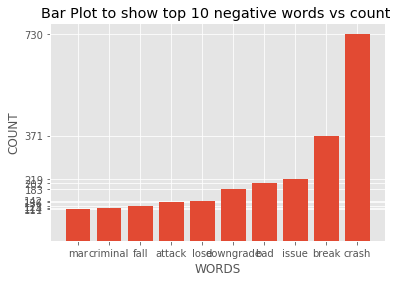

In [36]:
# Plotting the Bar Plot to show top 10 negative words vs count
y=my_list_names[-10:]
plt.bar(y, height=my_list_values[-10:])
plt.xticks(my_list_names[-10:],my_list_names[-10:])
plt.yticks(my_list_values[-10:])
plt.xlabel("WORDS")
plt.ylabel("COUNT")
plt.title("Bar Plot to show top 10 negative words vs count ")
plt.show()

In [37]:
for x in final_dataset_Tweets.Tweet_nonstop:
    for key in x:
        if key in pos_lines:
            if key in comb_word_tweet:
                comb_word_tweet[key] += x[key]
            else:
                comb_word_tweet[key] = x[key]

In [38]:
my_list_names = []
my_list_values = []

for key, value in sorted(comb_word_tweet.items(), key=lambda item: item[1]):
    my_list_names.append(key)
    my_list_values.append(value)
    count += 1

print(my_list_names[-10:], my_list_values[-10:])

['bad', 'right', 'issue', 'great', 'support', 'break', 'top', 'good', 'like', 'crash'] [202, 211, 219, 259, 331, 371, 371, 452, 521, 730]


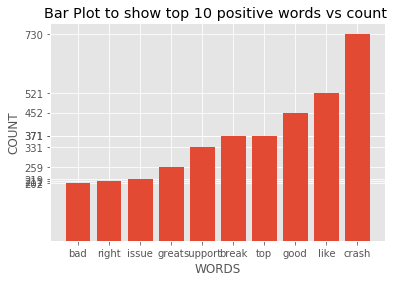

In [39]:
# Plotting the Bar Plot to show top 10 positive words vs count
y=my_list_names[-10:]
plt.bar(y, height=my_list_values[-10:])
plt.xticks(my_list_names[-10:],my_list_names[-10:])
plt.yticks(my_list_values[-10:])
plt.xlabel("WORDS")
plt.ylabel("COUNT")
plt.title("Bar Plot to show top 10 positive words vs count ")
plt.show()

In [40]:
#Sentiment Score Generator
final_dataset_Tweets['pos_parity_tweets']=final_dataset_Tweets['Tweet_nonstop'].apply(lambda x: pos_parity(x))

In [41]:
final_dataset_Tweets['neg_parity_tweets']=final_dataset_Tweets['Tweet_nonstop'].apply(lambda x: neg_parity(x))


In [42]:
final_dataset_Tweets

Month Day                                      Tweet_nonstop  \
0     03  16  {'j': 10, 'p': 10, 'morgan': 2, 'chase': 2, 'a...   
1     03  17  {'michaelkhouw': 4, 'maybe': 6, 'miss': 4, 'so...   
2     03  18  {'litzgerald': 2, 'hammerwielder': 2, 'michael...   
3     03  19  {'todays': 24, 'live': 14, 'trade': 102, 'webi...   
4     03  20  {'look': 28, 'like': 46, 'ba': 1168, 'hold': 3...   
5     03  21  {'ba': 882, 'boeing': 306, 'nasa': 4, 'blast':...   
6     03  22  {'ba': 1136, 'fitchsays': 2, 'boeing': 434, 'm...   
7     03  23  {'boeing': 96, 'ba': 292, 'quote': 2, 'fri': 4...   
8     03  24  {'market': 30, 'mayhem': 2, 'come': 10, 'sign'...   
9     03  25  {'': 89, 'mission': 1, 'abort': 1, 'spy': 58, ...   
10    03  26  {'free': 7, 'video': 6, 'setups': 2, 'mar': 3,...   
11    03  27  {'todays': 8, 'option': 5, 'order': 5, 'flow':...   
12    03  28  {'': 68, 'pump': 3, 'dump': 2, 'ba': 296, 'aap...   
13    03  30  {'ba': 28, 'spx': 4, 'call': 2, 'pay': 2, 'wee...   
14    03  31  {'bull': 2, 'amp': 10, 'bear': 3, 'week': 20, ...   
15    04  01  {'spx': 13, 'futures': 2, 'currently': 2, 'loa...   
16    04  02  {'give': 4, 'minutes': 3, 'wednesday': 2, 'sho...   
17    04  03  {'thestreet': 6, 'jimcramer': 9, 'markatross':...   
18    04  04  {'ba': 722, 'ah': 9, 'good': 15, 'djia': 8, 'd...   
19    04  05  {'one': 12, 'love': 7, 'ba': 658, 'stock': 91,...   
20    04  06  {'ba': 138, 'death': 1, 'max': 16, 'begin': 2,...   
21    04  07  {'canada': 1, 'ba': 136, 'worry': 2, 'straight...   
22    04  08  {'bostongoody': 3, 'redrum': 1, 'ba': 789, 'bo...   
23    04  09  {'april': 7, 'call': 19, 'todays': 12, 'trade'...   
24    04  10  {'ba': 429, 'sure': 3, 'much': 6, 'feed': 5, '...   
25    04  11  {'ba': 378, 'support': 13, 'let': 3, 'see': 12...   
26    04  12  {'todays': 11, 'largest': 2, 'directional': 1,...   
27    04  13  {'ba': 90, 'boeing': 39, 'co': 12, 'morningsta...   
28    04  14  {'top': 3, 'ytd': 1, 'spy': 5, 'since': 4, 'in...   
29    04  15  {'break': 10, 'boeing': 123, 'ba': 251, 'denni...   
30    04  16  {'april': 4, 'call': 23, 'todays': 2, 'trade':...   

    pos_parity_tweets  neg_parity_tweets  
0            0.037791           0.052907  
1            0.035678           0.060832  
2            0.035438           0.043871  
3            0.036534           0.042166  
4            0.032925           0.051881  
5            0.032129           0.047390  
6            0.038824           0.046405  
7            0.026059           0.040019  
8            0.029491           0.044504  
9            0.037787           0.030988  
10           0.033427           0.043999  
11           0.030458           0.040223  
12           0.035775           0.033007  
13           0.055794           0.036481  
14           0.021246           0.022191  
15           0.042782           0.034772  
16           0.032783           0.031201  
17           0.036983           0.047158  
18           0.038147           0.049046  
19           0.036654           0.046992  
20           0.031746           0.037999  
21           0.028169           0.044071  
22           0.030977           0.044378  
23           0.032476           0.037911  
24           0.036954           0.045455  
25           0.034648           0.035031  
26           0.042761           0.024161  
27           0.033500           0.034212  
28           0.034997           0.030407  
29           0.036945           0.023799  
30           0.039293           0.024361

In [43]:
new_df_Tweets = final_dataset_Tweets.drop(["Tweet_nonstop","Month","Day"], axis=1)
final_dataset_Tweets['Day'] = final_dataset_Tweets['Day'].astype(int)
final_dataset_Tweets['Month'] = final_dataset_Tweets['Month'].astype(int)
new_df_Tweets

pos_parity_tweets  neg_parity_tweets
0            0.037791           0.052907
1            0.035678           0.060832
2            0.035438           0.043871
3            0.036534           0.042166
4            0.032925           0.051881
5            0.032129           0.047390
6            0.038824           0.046405
7            0.026059           0.040019
8            0.029491           0.044504
9            0.037787           0.030988
10           0.033427           0.043999
11           0.030458           0.040223
12           0.035775           0.033007
13           0.055794           0.036481
14           0.021246           0.022191
15           0.042782           0.034772
16           0.032783           0.031201
17           0.036983           0.047158
18           0.038147           0.049046
19           0.036654           0.046992
20           0.031746           0.037999
21           0.028169           0.044071
22           0.030977           0.044378
23           0.032476           0.037911
24           0.036954           0.045455
25           0.034648           0.035031
26           0.042761           0.024161
27           0.033500           0.034212
28           0.034997           0.030407
29           0.036945           0.023799
30           0.039293           0.024361

In [44]:
#def mmdd_feature(x,y):
#    s=x+x/y
#    return float(s)

In [45]:
#Adding Date Feature that notifies each month and day discreetly
new_df_Tweets['date_feature']= (final_dataset_Tweets['Month']+final_dataset_Tweets['Day'])/final_dataset_Tweets['Month']

In [46]:
new_df_Tweets

pos_parity_tweets  neg_parity_tweets  date_feature
0            0.037791           0.052907      6.333333
1            0.035678           0.060832      6.666667
2            0.035438           0.043871      7.000000
3            0.036534           0.042166      7.333333
4            0.032925           0.051881      7.666667
5            0.032129           0.047390      8.000000
6            0.038824           0.046405      8.333333
7            0.026059           0.040019      8.666667
8            0.029491           0.044504      9.000000
9            0.037787           0.030988      9.333333
10           0.033427           0.043999      9.666667
11           0.030458           0.040223     10.000000
12           0.035775           0.033007     10.333333
13           0.055794           0.036481     11.000000
14           0.021246           0.022191     11.333333
15           0.042782           0.034772      1.250000
16           0.032783           0.031201      1.500000
17           0.036983           0.047158      1.750000
18           0.038147           0.049046      2.000000
19           0.036654           0.046992      2.250000
20           0.031746           0.037999      2.500000
21           0.028169           0.044071      2.750000
22           0.030977           0.044378      3.000000
23           0.032476           0.037911      3.250000
24           0.036954           0.045455      3.500000
25           0.034648           0.035031      3.750000
26           0.042761           0.024161      4.000000
27           0.033500           0.034212      4.250000
28           0.034997           0.030407      4.500000
29           0.036945           0.023799      4.750000
30           0.039293           0.024361      5.000000

### NEWS SENTIMENT ANALYSIS

In [47]:
#Loading News Data
df1 = pd.read_csv('BA.csv',encoding='utf=8') #header=None, names=['Date_time', 'Tweets'])
#df['Date'] = df['Date_time']

In [48]:
df1.head()

Date                                                 BA
0  4/16/19  eu issues 20 bln list of us imports for tariff...
1  4/16/19  lessors rush to repossess more jet airways pla...
2  4/16/19                  embraers e195 e2 is ready to fly 
3  4/16/19  etihad group cfo departs as carrier pursues tu...
4  4/16/19  boeing ba outpaces stock market gains what you...

In [49]:
# Following the same data cleaning process for the scrapped news data as done for the tweets

In [50]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [51]:
# Removing all punctuations
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', ' ', text)
    return text

df1['BA_punct'] = df1['BA'].apply(lambda x: remove_punct(x))
df1.head(10)

Date                                                 BA  \
0  4/16/19  eu issues 20 bln list of us imports for tariff...   
1  4/16/19  lessors rush to repossess more jet airways pla...   
2  4/16/19                  embraers e195 e2 is ready to fly    
3  4/16/19  etihad group cfo departs as carrier pursues tu...   
4  4/16/19  boeing ba outpaces stock market gains what you...   
5  4/16/19  market close report nasdaq composite index clo...   
6  4/16/19            dow closes higher on big boeing finish    
7  4/16/19  united airlines firstquarter profit rises hold...   
8  4/16/19  united airlines beats firstquarter profit esti...   
9  4/16/19  boeing 737 max software upgrade operationally ...   

                                            BA_punct  
0  eu issues   bln list of us imports for tariffs...  
1  lessors rush to repossess more jet airways pla...  
2                    embraers e  e  is ready to fly   
3  etihad group cfo departs as carrier pursues tu...  
4  boeing ba outpaces stock market gains what you...  
5  market close report nasdaq composite index clo...  
6            dow closes higher on big boeing finish   
7  united airlines firstquarter profit rises hold...  
8  united airlines beats firstquarter profit esti...  
9  boeing   max software upgrade operationally su...

In [52]:
# removing newline or \n expressions.
df1["BA_nonewline"] = [tweet.replace('\n'," ").strip() for tweet in df1["BA_punct"]]
df1.head(20)

Date                                                 BA  \
0   4/16/19  eu issues 20 bln list of us imports for tariff...   
1   4/16/19  lessors rush to repossess more jet airways pla...   
2   4/16/19                  embraers e195 e2 is ready to fly    
3   4/16/19  etihad group cfo departs as carrier pursues tu...   
4   4/16/19  boeing ba outpaces stock market gains what you...   
5   4/16/19  market close report nasdaq composite index clo...   
6   4/16/19            dow closes higher on big boeing finish    
7   4/16/19  united airlines firstquarter profit rises hold...   
8   4/16/19  united airlines beats firstquarter profit esti...   
9   4/16/19  boeing 737 max software upgrade operationally ...   
10  4/16/19  faa panel finds boeing 737 max software upgrad...   
11  4/16/19  kenyan family files lawsuit against boeing ove...   
12  4/16/19  us manufacturing mired in soft patch in first ...   
13  4/16/19  china forms task force to review design change...   
14  4/16/19  ge stocks latest plunge is another buying oppo...   
15  4/15/19      lackluster bank earnings pressure us markets    
16  4/15/19  boeing secures 14b deal for modernizing b 1 am...   
17  4/15/19  us stockswall street slips as bank earnings di...   
18  4/15/19  wall street slips as bank earnings disappoint ...   
19  4/15/19  us stocksfinancials drag on wall st as bank re...   

                                             BA_punct  \
0   eu issues   bln list of us imports for tariffs...   
1   lessors rush to repossess more jet airways pla...   
2                     embraers e  e  is ready to fly    
3   etihad group cfo departs as carrier pursues tu...   
4   boeing ba outpaces stock market gains what you...   
5   market close report nasdaq composite index clo...   
6             dow closes higher on big boeing finish    
7   united airlines firstquarter profit rises hold...   
8   united airlines beats firstquarter profit esti...   
9   boeing   max software upgrade operationally su...   
10  faa panel finds boeing   max software upgrade ...   
11  kenyan family files lawsuit against boeing ove...   
12  us manufacturing mired in soft patch in first ...   
13  china forms task force to review design change...   
14  ge stocks latest plunge is another buying oppo...   
15      lackluster bank earnings pressure us markets    
16  boeing secures  b deal for modernizing b   amp...   
17  us stockswall street slips as bank earnings di...   
18    wall street slips as bank earnings disappoint     
19  us stocksfinancials drag on wall st as bank re...   

                                         BA_nonewline  
0   eu issues   bln list of us imports for tariffs...  
1   lessors rush to repossess more jet airways pla...  
2                      embraers e  e  is ready to fly  
3   etihad group cfo departs as carrier pursues tu...  
4   boeing ba outpaces stock market gains what you...  
5   market close report nasdaq composite index clo...  
6              dow closes higher on big boeing finish  
7   united airlines firstquarter profit rises hold...  
8   united airlines beats firstquarter profit esti...  
9   boeing   max software upgrade operationally su...  
10  faa panel finds boeing   max software upgrade ...  
11  kenyan family files lawsuit against boeing ove...  
12  us manufacturing mired in soft patch in first ...  
13  china forms task force to review design change...  
14  ge stocks latest plunge is another buying oppo...  
15       lackluster bank earnings pressure us markets  
16  boeing secures  b deal for modernizing b   amp...  
17  us stockswall street slips as bank earnings di...  
18      wall street slips as bank earnings disappoint  
19  us stocksfinancials drag on wall st as bank re...

In [53]:
#Removing http url from every tweet substitued with space
df1["BA_wohttp"] = [re.sub(r"http\S+", " ", text) for text in df1["BA_nonewline"]]
df1.head()

Date                                                 BA  \
0  4/16/19  eu issues 20 bln list of us imports for tariff...   
1  4/16/19  lessors rush to repossess more jet airways pla...   
2  4/16/19                  embraers e195 e2 is ready to fly    
3  4/16/19  etihad group cfo departs as carrier pursues tu...   
4  4/16/19  boeing ba outpaces stock market gains what you...   

                                            BA_punct  \
0  eu issues   bln list of us imports for tariffs...   
1  lessors rush to repossess more jet airways pla...   
2                    embraers e  e  is ready to fly    
3  etihad group cfo departs as carrier pursues tu...   
4  boeing ba outpaces stock market gains what you...   

                                        BA_nonewline  \
0  eu issues   bln list of us imports for tariffs...   
1  lessors rush to repossess more jet airways pla...   
2                     embraers e  e  is ready to fly   
3  etihad group cfo departs as carrier pursues tu...   
4  boeing ba outpaces stock market gains what you...   

                                           BA_wohttp  
0  eu issues   bln list of us imports for tariffs...  
1  lessors rush to repossess more jet airways pla...  
2                     embraers e  e  is ready to fly  
3  etihad group cfo departs as carrier pursues tu...  
4  boeing ba outpaces stock market gains what you...

In [54]:
# Removing numbers
df1["BA_nonum"] = [re.sub("\d+", " ", text) for text in df1["BA_wohttp"]]
df1.head(20)

Date                                                 BA  \
0   4/16/19  eu issues 20 bln list of us imports for tariff...   
1   4/16/19  lessors rush to repossess more jet airways pla...   
2   4/16/19                  embraers e195 e2 is ready to fly    
3   4/16/19  etihad group cfo departs as carrier pursues tu...   
4   4/16/19  boeing ba outpaces stock market gains what you...   
5   4/16/19  market close report nasdaq composite index clo...   
6   4/16/19            dow closes higher on big boeing finish    
7   4/16/19  united airlines firstquarter profit rises hold...   
8   4/16/19  united airlines beats firstquarter profit esti...   
9   4/16/19  boeing 737 max software upgrade operationally ...   
10  4/16/19  faa panel finds boeing 737 max software upgrad...   
11  4/16/19  kenyan family files lawsuit against boeing ove...   
12  4/16/19  us manufacturing mired in soft patch in first ...   
13  4/16/19  china forms task force to review design change...   
14  4/16/19  ge stocks latest plunge is another buying oppo...   
15  4/15/19      lackluster bank earnings pressure us markets    
16  4/15/19  boeing secures 14b deal for modernizing b 1 am...   
17  4/15/19  us stockswall street slips as bank earnings di...   
18  4/15/19  wall street slips as bank earnings disappoint ...   
19  4/15/19  us stocksfinancials drag on wall st as bank re...   

                                             BA_punct  \
0   eu issues   bln list of us imports for tariffs...   
1   lessors rush to repossess more jet airways pla...   
2                     embraers e  e  is ready to fly    
3   etihad group cfo departs as carrier pursues tu...   
4   boeing ba outpaces stock market gains what you...   
5   market close report nasdaq composite index clo...   
6             dow closes higher on big boeing finish    
7   united airlines firstquarter profit rises hold...   
8   united airlines beats firstquarter profit esti...   
9   boeing   max software upgrade operationally su...   
10  faa panel finds boeing   max software upgrade ...   
11  kenyan family files lawsuit against boeing ove...   
12  us manufacturing mired in soft patch in first ...   
13  china forms task force to review design change...   
14  ge stocks latest plunge is another buying oppo...   
15      lackluster bank earnings pressure us markets    
16  boeing secures  b deal for modernizing b   amp...   
17  us stockswall street slips as bank earnings di...   
18    wall street slips as bank earnings disappoint     
19  us stocksfinancials drag on wall st as bank re...   

                                         BA_nonewline  \
0   eu issues   bln list of us imports for tariffs...   
1   lessors rush to repossess more jet airways pla...   
2                      embraers e  e  is ready to fly   
3   etihad group cfo departs as carrier pursues tu...   
4   boeing ba outpaces stock market gains what you...   
5   market close report nasdaq composite index clo...   
6              dow closes higher on big boeing finish   
7   united airlines firstquarter profit rises hold...   
8   united airlines beats firstquarter profit esti...   
9   boeing   max software upgrade operationally su...   
10  faa panel finds boeing   max software upgrade ...   
11  kenyan family files lawsuit against boeing ove...   
12  us manufacturing mired in soft patch in first ...   
13  china forms task force to review design change...   
14  ge stocks latest plunge is another buying oppo...   
15       lackluster bank earnings pressure us markets   
16  boeing secures  b deal for modernizing b   amp...   
17  us stockswall street slips as bank earnings di...   
18      wall street slips as bank earnings disappoint   
19  us stocksfinancials drag on wall st as bank re...   

                                            BA_wohttp  \
0   eu issues   bln list of us imports for tariffs...   
1   lessors rush to repossess more jet airways pla...   
2                      embraers e  e  is ready to fly

In [55]:
#Removing ASCII Values
df1["BA_noascii"] = [re.sub(r'[^\x00-\x7F]+',' ', text) for text in df1["BA_nonum"]]
df1.head()

Date                                                 BA  \
0  4/16/19  eu issues 20 bln list of us imports for tariff...   
1  4/16/19  lessors rush to repossess more jet airways pla...   
2  4/16/19                  embraers e195 e2 is ready to fly    
3  4/16/19  etihad group cfo departs as carrier pursues tu...   
4  4/16/19  boeing ba outpaces stock market gains what you...   

                                            BA_punct  \
0  eu issues   bln list of us imports for tariffs...   
1  lessors rush to repossess more jet airways pla...   
2                    embraers e  e  is ready to fly    
3  etihad group cfo departs as carrier pursues tu...   
4  boeing ba outpaces stock market gains what you...   

                                        BA_nonewline  \
0  eu issues   bln list of us imports for tariffs...   
1  lessors rush to repossess more jet airways pla...   
2                     embraers e  e  is ready to fly   
3  etihad group cfo departs as carrier pursues tu...   
4  boeing ba outpaces stock market gains what you...   

                                           BA_wohttp  \
0  eu issues   bln list of us imports for tariffs...   
1  lessors rush to repossess more jet airways pla...   
2                     embraers e  e  is ready to fly   
3  etihad group cfo departs as carrier pursues tu...   
4  boeing ba outpaces stock market gains what you...   

                                            BA_nonum  \
0  eu issues   bln list of us imports for tariffs...   
1  lessors rush to repossess more jet airways pla...   
2                     embraers e  e  is ready to fly   
3  etihad group cfo departs as carrier pursues tu...   
4  boeing ba outpaces stock market gains what you...   

                                          BA_noascii  
0  eu issues   bln list of us imports for tariffs...  
1  lessors rush to repossess more jet airways pla...  
2                     embraers e  e  is ready to fly  
3  etihad group cfo departs as carrier pursues tu...  
4  boeing ba outpaces stock market gains what you...

In [56]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df1['BA_tokenized'] = df1['BA_noascii'].apply(lambda x: tokenization(x.lower()))
df1.head()

Date                                                 BA  \
0  4/16/19  eu issues 20 bln list of us imports for tariff...   
1  4/16/19  lessors rush to repossess more jet airways pla...   
2  4/16/19                  embraers e195 e2 is ready to fly    
3  4/16/19  etihad group cfo departs as carrier pursues tu...   
4  4/16/19  boeing ba outpaces stock market gains what you...   

                                            BA_punct  \
0  eu issues   bln list of us imports for tariffs...   
1  lessors rush to repossess more jet airways pla...   
2                    embraers e  e  is ready to fly    
3  etihad group cfo departs as carrier pursues tu...   
4  boeing ba outpaces stock market gains what you...   

                                        BA_nonewline  \
0  eu issues   bln list of us imports for tariffs...   
1  lessors rush to repossess more jet airways pla...   
2                     embraers e  e  is ready to fly   
3  etihad group cfo departs as carrier pursues tu...   
4  boeing ba outpaces stock market gains what you...   

                                           BA_wohttp  \
0  eu issues   bln list of us imports for tariffs...   
1  lessors rush to repossess more jet airways pla...   
2                     embraers e  e  is ready to fly   
3  etihad group cfo departs as carrier pursues tu...   
4  boeing ba outpaces stock market gains what you...   

                                            BA_nonum  \
0  eu issues   bln list of us imports for tariffs...   
1  lessors rush to repossess more jet airways pla...   
2                     embraers e  e  is ready to fly   
3  etihad group cfo departs as carrier pursues tu...   
4  boeing ba outpaces stock market gains what you...   

                                          BA_noascii  \
0  eu issues   bln list of us imports for tariffs...   
1  lessors rush to repossess more jet airways pla...   
2                     embraers e  e  is ready to fly   
3  etihad group cfo departs as carrier pursues tu...   
4  boeing ba outpaces stock market gains what you...   

                                        BA_tokenized  
0  [eu, issues, bln, list, of, us, imports, for, ...  
1  [lessors, rush, to, repossess, more, jet, airw...  
2               [embraers, e, e, is, ready, to, fly]  
3  [etihad, group, cfo, departs, as, carrier, pur...  
4  [boeing, ba, outpaces, stock, market, gains, w...

In [57]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word, pos="v") for word in text]
    return text

df1['BA_lemmatized'] = df1['BA_tokenized'].apply(lambda x: lemmatizer(x))
df1.head()

Date                                                 BA  \
0  4/16/19  eu issues 20 bln list of us imports for tariff...   
1  4/16/19  lessors rush to repossess more jet airways pla...   
2  4/16/19                  embraers e195 e2 is ready to fly    
3  4/16/19  etihad group cfo departs as carrier pursues tu...   
4  4/16/19  boeing ba outpaces stock market gains what you...   

                                            BA_punct  \
0  eu issues   bln list of us imports for tariffs...   
1  lessors rush to repossess more jet airways pla...   
2                    embraers e  e  is ready to fly    
3  etihad group cfo departs as carrier pursues tu...   
4  boeing ba outpaces stock market gains what you...   

                                        BA_nonewline  \
0  eu issues   bln list of us imports for tariffs...   
1  lessors rush to repossess more jet airways pla...   
2                     embraers e  e  is ready to fly   
3  etihad group cfo departs as carrier pursues tu...   
4  boeing ba outpaces stock market gains what you...   

                                           BA_wohttp  \
0  eu issues   bln list of us imports for tariffs...   
1  lessors rush to repossess more jet airways pla...   
2                     embraers e  e  is ready to fly   
3  etihad group cfo departs as carrier pursues tu...   
4  boeing ba outpaces stock market gains what you...   

                                            BA_nonum  \
0  eu issues   bln list of us imports for tariffs...   
1  lessors rush to repossess more jet airways pla...   
2                     embraers e  e  is ready to fly   
3  etihad group cfo departs as carrier pursues tu...   
4  boeing ba outpaces stock market gains what you...   

                                          BA_noascii  \
0  eu issues   bln list of us imports for tariffs...   
1  lessors rush to repossess more jet airways pla...   
2                     embraers e  e  is ready to fly   
3  etihad group cfo departs as carrier pursues tu...   
4  boeing ba outpaces stock market gains what you...   

                                        BA_tokenized  \
0  [eu, issues, bln, list, of, us, imports, for, ...   
1  [lessors, rush, to, repossess, more, jet, airw...   
2               [embraers, e, e, is, ready, to, fly]   
3  [etihad, group, cfo, departs, as, carrier, pur...   
4  [boeing, ba, outpaces, stock, market, gains, w...   

                                       BA_lemmatized  
0  [eu, issue, bln, list, of, us, import, for, ta...  
1  [lessors, rush, to, repossess, more, jet, airw...  
2               [embraers, e, e, be, ready, to, fly]  
3  [etihad, group, cfo, depart, as, carrier, purs...  
4  [boeing, ba, outpace, stock, market, gain, wha...

In [58]:
stopword = nltk.corpus.stopwords.words('english')

In [59]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df1['BA_nonstop'] = df1['BA_lemmatized'].apply(lambda x: remove_stopwords(x))
df1.head()

Date                                                 BA  \
0  4/16/19  eu issues 20 bln list of us imports for tariff...   
1  4/16/19  lessors rush to repossess more jet airways pla...   
2  4/16/19                  embraers e195 e2 is ready to fly    
3  4/16/19  etihad group cfo departs as carrier pursues tu...   
4  4/16/19  boeing ba outpaces stock market gains what you...   

                                            BA_punct  \
0  eu issues   bln list of us imports for tariffs...   
1  lessors rush to repossess more jet airways pla...   
2                    embraers e  e  is ready to fly    
3  etihad group cfo departs as carrier pursues tu...   
4  boeing ba outpaces stock market gains what you...   

                                        BA_nonewline  \
0  eu issues   bln list of us imports for tariffs...   
1  lessors rush to repossess more jet airways pla...   
2                     embraers e  e  is ready to fly   
3  etihad group cfo departs as carrier pursues tu...   
4  boeing ba outpaces stock market gains what you...   

                                           BA_wohttp  \
0  eu issues   bln list of us imports for tariffs...   
1  lessors rush to repossess more jet airways pla...   
2                     embraers e  e  is ready to fly   
3  etihad group cfo departs as carrier pursues tu...   
4  boeing ba outpaces stock market gains what you...   

                                            BA_nonum  \
0  eu issues   bln list of us imports for tariffs...   
1  lessors rush to repossess more jet airways pla...   
2                     embraers e  e  is ready to fly   
3  etihad group cfo departs as carrier pursues tu...   
4  boeing ba outpaces stock market gains what you...   

                                          BA_noascii  \
0  eu issues   bln list of us imports for tariffs...   
1  lessors rush to repossess more jet airways pla...   
2                     embraers e  e  is ready to fly   
3  etihad group cfo departs as carrier pursues tu...   
4  boeing ba outpaces stock market gains what you...   

                                        BA_tokenized  \
0  [eu, issues, bln, list, of, us, imports, for, ...   
1  [lessors, rush, to, repossess, more, jet, airw...   
2               [embraers, e, e, is, ready, to, fly]   
3  [etihad, group, cfo, departs, as, carrier, pur...   
4  [boeing, ba, outpaces, stock, market, gains, w...   

                                       BA_lemmatized  \
0  [eu, issue, bln, list, of, us, import, for, ta...   
1  [lessors, rush, to, repossess, more, jet, airw...   
2               [embraers, e, e, be, ready, to, fly]   
3  [etihad, group, cfo, depart, as, carrier, purs...   
4  [boeing, ba, outpace, stock, market, gain, wha...   

                                          BA_nonstop  
0  [eu, issue, bln, list, us, import, tariff, boe...  
1  [lessors, rush, repossess, jet, airways, plan,...  
2                       [embraers, e, e, ready, fly]  
3  [etihad, group, cfo, depart, carrier, pursue, ...  
4   [boeing, ba, outpace, stock, market, gain, know]

In [60]:
BA_Data_News = df1.drop(["BA","BA_punct","BA_nonewline","BA_wohttp","BA_nonum","BA_noascii","BA_tokenized","BA_lemmatized"], axis=1)

In [61]:
BA_Data_News.head()
print(type(BA_Data_News.Date))

<class 'pandas.core.series.Series'>


In [62]:
BA_Data_News['Month']=[d.split('/')[0] for d in BA_Data_News.Date]
BA_Data_News['Day']=[d.split('/')[1] for d in BA_Data_News.Date]
BA_Data_News['Year']=[d.split('/')[2] for d in BA_Data_News.Date]

In [63]:
BA_Data_News.head()

Date                                         BA_nonstop Month Day Year
0  4/16/19  [eu, issue, bln, list, us, import, tariff, boe...     4  16   19
1  4/16/19  [lessors, rush, repossess, jet, airways, plan,...     4  16   19
2  4/16/19                       [embraers, e, e, ready, fly]     4  16   19
3  4/16/19  [etihad, group, cfo, depart, carrier, pursue, ...     4  16   19
4  4/16/19   [boeing, ba, outpace, stock, market, gain, know]     4  16   19

In [64]:
BA_Data_News = BA_Data_News.drop(['Date','Year'],axis=1)


In [65]:
BA_Data_News.head(50)

BA_nonstop Month Day
0   [eu, issue, bln, list, us, import, tariff, boe...     4  16
1   [lessors, rush, repossess, jet, airways, plan,...     4  16
2                        [embraers, e, e, ready, fly]     4  16
3   [etihad, group, cfo, depart, carrier, pursue, ...     4  16
4    [boeing, ba, outpace, stock, market, gain, know]     4  16
5   [market, close, report, nasdaq, composite, ind...     4  16
6           [dow, close, higher, big, boeing, finish]     4  16
7   [unite, airlines, firstquarter, profit, rise, ...     4  16
8   [unite, airlines, beat, firstquarter, profit, ...     4  16
9   [boeing, max, software, upgrade, operationally...     4  16
10  [faa, panel, find, boeing, max, software, upgr...     4  16
11  [kenyan, family, file, lawsuit, boeing, ethiop...     4  16
12  [us, manufacture, mire, soft, patch, first, qu...     4  16
13  [china, form, task, force, review, design, cha...     4  16
14  [ge, stock, latest, plunge, another, buy, oppo...     4  16
15     [lackluster, bank, earn, pressure, us, market]     4  15
16  [boeing, secure, b, deal, modernize, b, amp, b...     4  15
17  [us, stockswall, street, slip, bank, earn, dis...     4  15
18       [wall, street, slip, bank, earn, disappoint]     4  15
19  [us, stocksfinancials, drag, wall, st, bank, r...     4  15
20  [financials, drag, wall, st, bank, result, und...     4  15
21               [boeing, ba, great, dividend, stock]     4  15
22     [wall, street, drop, tepid, big, bank, result]     4  15
23  [us, stockswall, street, drop, tepid, big, ban...     4  15
24                              [math, show, ppa, go]     4  15
25  [us, stock, movegoldman, boeing, biopath, alli...     4  15
26  [european, share, hit, us, tariff, threat, gro...     4  15
27  [us, stockswall, street, slip, big, bank, resu...     4  15
28  [wall, street, slip, big, bank, result, disapp...     4  15
29   [wall, street, dip, lackluster, big, bank, earn]     4  15
30  [us, stockswall, street, dip, lackluster, big,...     4  15
31  [us, stock, movelevi, strauss, aphria, western...     4  15
32  [us, stockswall, st, set, mute, open, big, ban...     4  15
33  [wall, st, set, mute, open, big, bank, earn, f...     4  15
34            [futures, mute, ahead, big, bank, earn]     4  15
35  [us, stocksfutures, mute, ahead, big, bank, earn]     4  15
36         [trump, urge, rebrand, max, boeing, ideas]     4  15
37  [boeing, brainstorm, regain, trust, max, trump...     4  15
38  [trump, say, boeing, fix, rebrand, ground, max...     4  15
39  [trump, urge, boeing, fix, rebrand, ground, ma...     4  15
40  [alaska, airlines, may, order, ton, boeing, ma...     4  14
41  [blame, marijuana, year, high, positive, work,...     4  14
42                [top, defense, stock, watch, april]     4  14
43  [many, travelers, plan, us, airlines, max, sum...     4  14
44  [boeing, crush, airbus, q, aircraft, order, de...     4  13
45       [better, buy, general, electric, vs, boeing]     4  13
46  [noteworthy, friday, option, activity, ba, nss...     4  12
47  [us, stockssp, close, near, record, high, earn...     4  12
48  [sp, close, near, record, high, earn, season, ...     4  12
49  [sp, climb, near, record, high, earn, season, ...     4  12

In [66]:
final_dataset_News = pd.DataFrame(data=None, index=None,columns=['Month','Day','BA_nonstop'])

In [67]:
final_dataset_News = BA_Data_News.groupby(['Month','Day'])['BA_nonstop'].apply(list).reset_index()

In [68]:
final_dataset_News

Month Day                                         BA_nonstop
0      3  16  [[airbus, order, book, shrink, february], [int...
1      3  17  [[ethiopian, airlines, black, box, show, simil...
2      3  18  [[stock, market, today, fis, worldpay, merge, ...
3      3  19  [[boeing, ba, gain, market, dip, know], [dow, ...
4      3  20  [[boeing, delay, months, test, flight, us, hum...
5      3  21  [[buy, boeing, aerospace, defense, stock, desp...
6      3  22  [[us, stock, movetesla, ge, nike, southwest, a...
7      3  23  [[us, lawmaker, seek, boeing, whistleblowers, ...
8      3  24  [[ethiopian, airlines, question, boeings, aggr...
9      3  25  [[market, close, report, nasdaq, composite, in...
10     3  26  [[boeing, ba, stock, sink, market, gain, know]...
11     3  27  [[market, close, report, nasdaq, composite, in...
12     3  28  [[noteworthy, thursday, option, activity, titn...
13     3  29  [[invest, fidelity, msci, industrials, index, ...
14     3  30  [[strongest, quarter, since, sp], [general, dy...
15     3  31  [[regulators, know, crash, max, trim, control,...
16     4   1  [[manufacture, rebound, push, asian, share, mo...
17     4  10  [[boeing, ba, stock, sink, market, gain, know]...
18     4  11  [[elon, musks, spacex, send, worlds, powerful,...
19     4  12  [[noteworthy, friday, option, activity, ba, ns...
20     4  13  [[boeing, crush, airbus, q, aircraft, order, d...
21     4  14  [[alaska, airlines, may, order, ton, boeing, m...
22     4  15  [[lackluster, bank, earn, pressure, us, market...
23     4  16  [[eu, issue, bln, list, us, import, tariff, bo...
24     4   2  [[airline, stock, ready, take, flight], [posit...
25     4   3  [[nasdaq, composite, index, close, point, week...
26     4   4  [[market, close, report, nasdaq, composite, in...
27     4   5  [[stock, market, news, apr], [g, iii, smart, b...
28     4   6  [[heres, expect, delta, air, line, dal, q, ear...
29     4   7  [[flaw, software, excess, speed, doom, ethiopi...
30     4   8  [[china, aircraft, lease, say, put, boeing, ma...
31     4   9  [[tariff, trouble, drag, dow, sp, snap, win, s...

In [69]:
#### APPLIED LIST TO DICT USING THE FUNCTION ABOVE

In [70]:
final_dataset_News['BA_nonstop']=final_dataset_News['BA_nonstop'].apply(lambda x: ltod(x))

In [71]:
final_dataset_News

Month Day                                         BA_nonstop
0      3  16  {'airbus': 1, 'order': 1, 'book': 1, 'shrink':...
1      3  17  {'ethiopian': 1, 'airlines': 1, 'black': 1, 'b...
2      3  18  {'stock': 17, 'market': 6, 'today': 1, 'fis': ...
3      3  19  {'boeing': 7, 'ba': 1, 'gain': 1, 'market': 2,...
4      3  20  {'boeing': 8, 'delay': 2, 'months': 1, 'test':...
5      3  21  {'buy': 1, 'boeing': 4, 'aerospace': 1, 'defen...
6      3  22  {'us': 4, 'stock': 5, 'movetesla': 1, 'ge': 1,...
7      3  23  {'us': 5, 'lawmaker': 1, 'seek': 1, 'boeing': ...
8      3  24  {'ethiopian': 1, 'airlines': 1, 'question': 1,...
9      3  25  {'market': 1, 'close': 3, 'report': 2, 'nasdaq...
10     3  26  {'boeing': 8, 'ba': 3, 'stock': 2, 'sink': 1, ...
11     3  27  {'market': 1, 'close': 2, 'report': 1, 'nasdaq...
12     3  28  {'noteworthy': 1, 'thursday': 1, 'option': 1, ...
13     3  29  {'invest': 1, 'fidelity': 1, 'msci': 1, 'indus...
14     3  30  {'strongest': 1, 'quarter': 2, 'since': 1, 'sp...
15     3  31  {'regulators': 1, 'know': 1, 'crash': 1, 'max'...
16     4   1  {'manufacture': 5, 'rebound': 3, 'push': 1, 'a...
17     4  10  {'boeing': 6, 'ba': 3, 'stock': 9, 'sink': 1, ...
18     4  11  {'elon': 1, 'musks': 1, 'spacex': 1, 'send': 1...
19     4  12  {'noteworthy': 1, 'friday': 1, 'option': 1, 'a...
20     4  13  {'boeing': 2, 'crush': 1, 'airbus': 1, 'q': 1,...
21     4  14  {'alaska': 1, 'airlines': 2, 'may': 1, 'order'...
22     4  15  {'lackluster': 3, 'bank': 15, 'earn': 9, 'pres...
23     4  16  {'eu': 1, 'issue': 1, 'bln': 1, 'list': 1, 'us...
24     4   2  {'airline': 1, 'stock': 6, 'ready': 1, 'take':...
25     4   3  {'nasdaq': 2, 'composite': 1, 'index': 5, 'clo...
26     4   4  {'market': 2, 'close': 3, 'report': 6, 'nasdaq...
27     4   5  {'stock': 6, 'market': 1, 'news': 1, 'apr': 1,...
28     4   6  {'heres': 1, 'expect': 1, 'delta': 1, 'air': 1...
29     4   7  {'flaw': 1, 'software': 1, 'excess': 1, 'speed...
30     4   8  {'china': 2, 'aircraft': 2, 'lease': 2, 'say':...
31     4   9  {'tariff': 5, 'trouble': 1, 'drag': 1, 'dow': ...

In [72]:
comb_word_news={}
len(final_dataset_News.BA_nonstop)

32

In [73]:
#Performing Data Analysis on the Text to get information about the top 10 most used positive and negative words for news
for x in final_dataset_News.BA_nonstop:
    for key in x:
        if key in neg_lines:
            if key in comb_word_news:
                comb_word_news[key] += x[key]
            else:
                comb_word_news[key] = x[key]


In [74]:
my_list_names = []
my_list_values = []
count = 0
for key, value in sorted(comb_word_news.items(), key=lambda item: item[1]):
    my_list_names.append(key)
    my_list_values.append(value)
    count += 1

print(my_list_names[-10:], my_list_values[-10:])


['doom', 'stall', 'concern', 'mar', 'jitters', 'worry', 'drag', 'fear', 'fall', 'crash'] [5, 5, 5, 7, 7, 13, 14, 15, 17, 63]


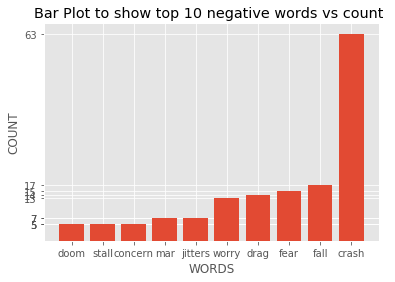

In [75]:
# Plotting the Bar Plot to show top 10 negative words vs count 
y=my_list_names[-10:]
plt.bar(y, height=my_list_values[-10:])
plt.xticks(my_list_names[-10:],my_list_names[-10:])
plt.yticks(my_list_values[-10:])
plt.xlabel("WORDS")
plt.ylabel("COUNT")
plt.title("Bar Plot to show top 10 negative words vs count ")
plt.show()

In [76]:
comb_word_news={}

In [77]:
for x in final_dataset_News.BA_nonstop:
    for key in x:
        if key in pos_lines:
            if key in comb_word_news:
                comb_word_news[key] += x[key]
            else:
                comb_word_news[key] = x[key]

In [78]:
my_list_names = []
my_list_values = []
count = 0
for key, value in sorted(comb_word_news.items(), key=lambda item: item[1]):
    my_list_names.append(key)
    my_list_values.append(value)
    count += 1

print(my_list_names[-10:], my_list_values[-10:])

['approval', 'optimism', 'best', 'trump', 'top', 'secure', 'support', 'boost', 'win', 'gain'] [5, 6, 7, 7, 8, 8, 8, 10, 19, 19]


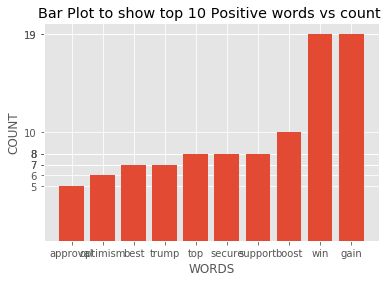

In [79]:
# Plotting the Bar Plot to show top 10 positive words vs count 
y=my_list_names[-10:]
plt.bar(y, height=my_list_values[-10:])
plt.xticks(my_list_names[-10:],my_list_names[-10:])
plt.yticks(my_list_values[-10:])
plt.xlabel("WORDS")
plt.ylabel("COUNT")
plt.title("Bar Plot to show top 10 Positive words vs count ")
plt.show()

In [80]:
#### USING POSITIVE LIST AND NEGATIVE LIST

In [81]:
final_dataset_News['pos_parity_news']=final_dataset_News['BA_nonstop'].apply(lambda x: pos_parity(x))

In [82]:
final_dataset_News['neg_parity_news']=final_dataset_News['BA_nonstop'].apply(lambda x: neg_parity(x))

In [83]:
final_dataset_News

Month Day                                         BA_nonstop  \
0      3  16  {'airbus': 1, 'order': 1, 'book': 1, 'shrink':...   
1      3  17  {'ethiopian': 1, 'airlines': 1, 'black': 1, 'b...   
2      3  18  {'stock': 17, 'market': 6, 'today': 1, 'fis': ...   
3      3  19  {'boeing': 7, 'ba': 1, 'gain': 1, 'market': 2,...   
4      3  20  {'boeing': 8, 'delay': 2, 'months': 1, 'test':...   
5      3  21  {'buy': 1, 'boeing': 4, 'aerospace': 1, 'defen...   
6      3  22  {'us': 4, 'stock': 5, 'movetesla': 1, 'ge': 1,...   
7      3  23  {'us': 5, 'lawmaker': 1, 'seek': 1, 'boeing': ...   
8      3  24  {'ethiopian': 1, 'airlines': 1, 'question': 1,...   
9      3  25  {'market': 1, 'close': 3, 'report': 2, 'nasdaq...   
10     3  26  {'boeing': 8, 'ba': 3, 'stock': 2, 'sink': 1, ...   
11     3  27  {'market': 1, 'close': 2, 'report': 1, 'nasdaq...   
12     3  28  {'noteworthy': 1, 'thursday': 1, 'option': 1, ...   
13     3  29  {'invest': 1, 'fidelity': 1, 'msci': 1, 'indus...   
14     3  30  {'strongest': 1, 'quarter': 2, 'since': 1, 'sp...   
15     3  31  {'regulators': 1, 'know': 1, 'crash': 1, 'max'...   
16     4   1  {'manufacture': 5, 'rebound': 3, 'push': 1, 'a...   
17     4  10  {'boeing': 6, 'ba': 3, 'stock': 9, 'sink': 1, ...   
18     4  11  {'elon': 1, 'musks': 1, 'spacex': 1, 'send': 1...   
19     4  12  {'noteworthy': 1, 'friday': 1, 'option': 1, 'a...   
20     4  13  {'boeing': 2, 'crush': 1, 'airbus': 1, 'q': 1,...   
21     4  14  {'alaska': 1, 'airlines': 2, 'may': 1, 'order'...   
22     4  15  {'lackluster': 3, 'bank': 15, 'earn': 9, 'pres...   
23     4  16  {'eu': 1, 'issue': 1, 'bln': 1, 'list': 1, 'us...   
24     4   2  {'airline': 1, 'stock': 6, 'ready': 1, 'take':...   
25     4   3  {'nasdaq': 2, 'composite': 1, 'index': 5, 'clo...   
26     4   4  {'market': 2, 'close': 3, 'report': 6, 'nasdaq...   
27     4   5  {'stock': 6, 'market': 1, 'news': 1, 'apr': 1,...   
28     4   6  {'heres': 1, 'expect': 1, 'delta': 1, 'air': 1...   
29     4   7  {'flaw': 1, 'software': 1, 'excess': 1, 'speed...   
30     4   8  {'china': 2, 'aircraft': 2, 'lease': 2, 'say':...   
31     4   9  {'tariff': 5, 'trouble': 1, 'drag': 1, 'dow': ...   

    pos_parity_news  neg_parity_news  
0          0.000000         0.062500  
1          0.000000         0.050000  
2          0.035639         0.052411  
3          0.019108         0.031847  
4          0.013423         0.073826  
5          0.018987         0.063291  
6          0.052174         0.086957  
7          0.011765         0.117647  
8          0.000000         0.166667  
9          0.039062         0.101562  
10         0.030303         0.090909  
11         0.020833         0.055556  
12         0.035088         0.070175  
13         0.048077         0.086538  
14         0.136364         0.022727  
15         0.000000         0.133333  
16         0.035461         0.042553  
17         0.040741         0.040741  
18         0.029851         0.000000  
19         0.031496         0.015748  
20         0.066667         0.133333  
21         0.100000         0.066667  
22         0.048128         0.080214  
23         0.043103         0.034483  
24         0.072368         0.052632  
25         0.026022         0.044610  
26         0.015936         0.039841  
27         0.046784         0.058480  
28         0.053191         0.085106  
29         0.000000         0.250000  
30         0.018667         0.064000  
31         0.019324         0.111111

In [84]:
new_df_News= final_dataset_News.drop(["BA_nonstop","Month","Day"], axis=1)
final_dataset_News['Day'] = final_dataset_News['Day'].astype(int)
final_dataset_News['Month'] = final_dataset_News['Month'].astype(int)
new_df_News

pos_parity_news  neg_parity_news
0          0.000000         0.062500
1          0.000000         0.050000
2          0.035639         0.052411
3          0.019108         0.031847
4          0.013423         0.073826
5          0.018987         0.063291
6          0.052174         0.086957
7          0.011765         0.117647
8          0.000000         0.166667
9          0.039062         0.101562
10         0.030303         0.090909
11         0.020833         0.055556
12         0.035088         0.070175
13         0.048077         0.086538
14         0.136364         0.022727
15         0.000000         0.133333
16         0.035461         0.042553
17         0.040741         0.040741
18         0.029851         0.000000
19         0.031496         0.015748
20         0.066667         0.133333
21         0.100000         0.066667
22         0.048128         0.080214
23         0.043103         0.034483
24         0.072368         0.052632
25         0.026022         0.044610
26         0.015936         0.039841
27         0.046784         0.058480
28         0.053191         0.085106
29         0.000000         0.250000
30         0.018667         0.064000
31         0.019324         0.111111

### GETTING STOCKS DATA

In [85]:
df2 = pd.read_csv('Boeing_Stock.csv',encoding='utf=8') #header=None, names=['Date_time', 'Tweets'])
#df['Date'] = df['Date_time']

In [86]:
df2

Date        High         Low        Open       Close    Volume  \
0   3/15/2019  385.709992  366.450012  370.880005  378.989990  26697700   
1   3/16/2019  385.709992  366.450012  370.880005  378.989990  26697700   
2   3/17/2019  385.709992  366.450012  370.880005  378.989990  26697700   
3   3/18/2019  373.070007  367.200012  370.000000  372.279999  13119200   
4   3/19/2019  378.769989  371.010010  371.140015  373.429993   9856100   
5   3/20/2019  380.799988  373.679993  374.700012  376.160004   8737600   
6   3/21/2019  377.000000  372.230011  374.040008  372.700012   6951000   
7   3/22/2019  369.859985  361.529999  368.790008  362.170013  10143900   
8   3/23/2019  369.859985  361.529999  368.790008  362.170013  10143900   
9   3/24/2019  369.859985  361.529999  368.790008  362.170013  10143900   
10  3/25/2019  371.209992  362.890015  365.000000  370.459992   7939600   
11  3/26/2019  375.600006  367.600006  375.579987  370.380005   6479700   
12  3/27/2019  376.660004  365.549988  371.890015  374.209992   9600000   
13  3/28/2019  376.660004  372.329987  376.600006  374.440002   4921300   
14  3/29/2019  382.179993  374.739990  376.519989  381.420013   7694700   
15  3/30/2019  382.179993  374.739990  376.519989  381.420013   7694700   
16  3/31/2019  382.179993  374.739990  376.519989  381.420013   7694700   
17   4/1/2019  392.899994  383.100006  385.799988  391.540008   7735700   
18   4/2/2019  394.829987  388.500000  388.500000  390.750000   6401000   
19   4/3/2019  391.540008  384.070007  389.679993  384.739990   7350300   
20   4/4/2019  397.059998  385.100006  385.989990  395.859985   9388100   
21   4/5/2019  398.660004  390.950012  398.070007  391.929993   6857200   
22   4/6/2019  398.660004  390.950012  398.070007  391.929993   6857200   
23   4/7/2019  398.660004  390.950012  398.070007  391.929993   6857200   
24   4/8/2019  379.799988  371.859985  376.200012  374.519989  14482600   
25   4/9/2019  372.239990  367.750000  370.290008  369.040008   7980100   
26  4/10/2019  368.790008  362.920013  368.399994  364.940002   8285000   
27  4/11/2019  371.079987  364.209992  364.619995  370.160004   6598400   
28  4/12/2019  379.950012  372.000000  375.750000  379.640015   7334600   
29  4/13/2019  379.950012  372.000000  375.750000  379.640015   7334600   
30  4/14/2019  379.950012  372.000000  375.750000  379.640015   7334600   
31  4/15/2019  377.899994  373.679993  376.700012  375.459992   3822100   
32  4/16/2019  384.640015  375.029999  376.510010  381.720001   7083800   

     Adj Close  
0   378.989990  
1   378.989990  
2   378.989990  
3   372.279999  
4   373.429993  
5   376.160004  
6   372.700012  
7   362.170013  
8   362.170013  
9   362.170013  
10  370.459992  
11  370.380005  
12  374.209992  
13  374.440002  
14  381.420013  
15  381.420013  
16  381.420013  
17  391.540008  
18  390.750000  
19  384.739990  
20  395.859985  
21  391.929993  
22  391.929993  
23  391.929993  
24  374.519989  
25  369.040008  
26  364.940002  
27  370.160004  
28  379.640015  
29  379.640015  
30  379.640015  
31  375.459992  
32  381.720001

In [87]:
Vol=df2[['Volume']]

In [88]:
#Calculating normalized value for Volume of Stocks using preprocessing.
min_max_scaler=preprocessing.MinMaxScaler()
vol_scaled=min_max_scaler.fit_transform(Vol)

In [89]:
Vol_normalized=pd.DataFrame(vol_scaled,columns=["Volume_norm"])
df2["Vol_normalized"]=Vol_normalized
df2

Date        High         Low        Open       Close    Volume  \
0   3/15/2019  385.709992  366.450012  370.880005  378.989990  26697700   
1   3/16/2019  385.709992  366.450012  370.880005  378.989990  26697700   
2   3/17/2019  385.709992  366.450012  370.880005  378.989990  26697700   
3   3/18/2019  373.070007  367.200012  370.000000  372.279999  13119200   
4   3/19/2019  378.769989  371.010010  371.140015  373.429993   9856100   
5   3/20/2019  380.799988  373.679993  374.700012  376.160004   8737600   
6   3/21/2019  377.000000  372.230011  374.040008  372.700012   6951000   
7   3/22/2019  369.859985  361.529999  368.790008  362.170013  10143900   
8   3/23/2019  369.859985  361.529999  368.790008  362.170013  10143900   
9   3/24/2019  369.859985  361.529999  368.790008  362.170013  10143900   
10  3/25/2019  371.209992  362.890015  365.000000  370.459992   7939600   
11  3/26/2019  375.600006  367.600006  375.579987  370.380005   6479700   
12  3/27/2019  376.660004  365.549988  371.890015  374.209992   9600000   
13  3/28/2019  376.660004  372.329987  376.600006  374.440002   4921300   
14  3/29/2019  382.179993  374.739990  376.519989  381.420013   7694700   
15  3/30/2019  382.179993  374.739990  376.519989  381.420013   7694700   
16  3/31/2019  382.179993  374.739990  376.519989  381.420013   7694700   
17   4/1/2019  392.899994  383.100006  385.799988  391.540008   7735700   
18   4/2/2019  394.829987  388.500000  388.500000  390.750000   6401000   
19   4/3/2019  391.540008  384.070007  389.679993  384.739990   7350300   
20   4/4/2019  397.059998  385.100006  385.989990  395.859985   9388100   
21   4/5/2019  398.660004  390.950012  398.070007  391.929993   6857200   
22   4/6/2019  398.660004  390.950012  398.070007  391.929993   6857200   
23   4/7/2019  398.660004  390.950012  398.070007  391.929993   6857200   
24   4/8/2019  379.799988  371.859985  376.200012  374.519989  14482600   
25   4/9/2019  372.239990  367.750000  370.290008  369.040008   7980100   
26  4/10/2019  368.790008  362.920013  368.399994  364.940002   8285000   
27  4/11/2019  371.079987  364.209992  364.619995  370.160004   6598400   
28  4/12/2019  379.950012  372.000000  375.750000  379.640015   7334600   
29  4/13/2019  379.950012  372.000000  375.750000  379.640015   7334600   
30  4/14/2019  379.950012  372.000000  375.750000  379.640015   7334600   
31  4/15/2019  377.899994  373.679993  376.700012  375.459992   3822100   
32  4/16/2019  384.640015  375.029999  376.510010  381.720001   7083800   

     Adj Close  Vol_normalized  
0   378.989990        1.000000  
1   378.989990        1.000000  
2   378.989990        1.000000  
3   372.279999        0.406420  
4   373.429993        0.263775  
5   376.160004        0.214880  
6   372.700012        0.136779  
7   362.170013        0.276356  
8   362.170013        0.276356  
9   362.170013        0.276356  
10  370.459992        0.179995  
11  370.380005        0.116176  
12  374.209992        0.252579  
13  374.440002        0.048051  
14  381.420013        0.169290  
15  381.420013        0.169290  
16  381.420013        0.169290  
17  391.540008        0.171082  
18  390.750000        0.112736  
19  384.739990        0.154234  
20  395.859985        0.243316  
21  391.929993        0.132678  
22  391.929993        0.132678  
23  391.929993        0.132678  
24  374.519989        0.466021  
25  369.040008        0.181766  
26  364.940002        0.195094  
27  370.160004        0.121365  
28  379.640015        0.153548  
29  379.640015        0.153548  
30  379.640015        0.153548  
31  375.459992        0.000000  
32  381.720001        0.142584

In [90]:
df2['daily_return']= (df2['Close']-df2['Open'])/df2['Open']
df2

Date        High         Low        Open       Close    Volume  \
0   3/15/2019  385.709992  366.450012  370.880005  378.989990  26697700   
1   3/16/2019  385.709992  366.450012  370.880005  378.989990  26697700   
2   3/17/2019  385.709992  366.450012  370.880005  378.989990  26697700   
3   3/18/2019  373.070007  367.200012  370.000000  372.279999  13119200   
4   3/19/2019  378.769989  371.010010  371.140015  373.429993   9856100   
5   3/20/2019  380.799988  373.679993  374.700012  376.160004   8737600   
6   3/21/2019  377.000000  372.230011  374.040008  372.700012   6951000   
7   3/22/2019  369.859985  361.529999  368.790008  362.170013  10143900   
8   3/23/2019  369.859985  361.529999  368.790008  362.170013  10143900   
9   3/24/2019  369.859985  361.529999  368.790008  362.170013  10143900   
10  3/25/2019  371.209992  362.890015  365.000000  370.459992   7939600   
11  3/26/2019  375.600006  367.600006  375.579987  370.380005   6479700   
12  3/27/2019  376.660004  365.549988  371.890015  374.209992   9600000   
13  3/28/2019  376.660004  372.329987  376.600006  374.440002   4921300   
14  3/29/2019  382.179993  374.739990  376.519989  381.420013   7694700   
15  3/30/2019  382.179993  374.739990  376.519989  381.420013   7694700   
16  3/31/2019  382.179993  374.739990  376.519989  381.420013   7694700   
17   4/1/2019  392.899994  383.100006  385.799988  391.540008   7735700   
18   4/2/2019  394.829987  388.500000  388.500000  390.750000   6401000   
19   4/3/2019  391.540008  384.070007  389.679993  384.739990   7350300   
20   4/4/2019  397.059998  385.100006  385.989990  395.859985   9388100   
21   4/5/2019  398.660004  390.950012  398.070007  391.929993   6857200   
22   4/6/2019  398.660004  390.950012  398.070007  391.929993   6857200   
23   4/7/2019  398.660004  390.950012  398.070007  391.929993   6857200   
24   4/8/2019  379.799988  371.859985  376.200012  374.519989  14482600   
25   4/9/2019  372.239990  367.750000  370.290008  369.040008   7980100   
26  4/10/2019  368.790008  362.920013  368.399994  364.940002   8285000   
27  4/11/2019  371.079987  364.209992  364.619995  370.160004   6598400   
28  4/12/2019  379.950012  372.000000  375.750000  379.640015   7334600   
29  4/13/2019  379.950012  372.000000  375.750000  379.640015   7334600   
30  4/14/2019  379.950012  372.000000  375.750000  379.640015   7334600   
31  4/15/2019  377.899994  373.679993  376.700012  375.459992   3822100   
32  4/16/2019  384.640015  375.029999  376.510010  381.720001   7083800   

     Adj Close  Vol_normalized  daily_return  
0   378.989990        1.000000      0.021867  
1   378.989990        1.000000      0.021867  
2   378.989990        1.000000      0.021867  
3   372.279999        0.406420      0.006162  
4   373.429993        0.263775      0.006170  
5   376.160004        0.214880      0.003896  
6   372.700012        0.136779     -0.003582  
7   362.170013        0.276356     -0.017951  
8   362.170013        0.276356     -0.017951  
9   362.170013        0.276356     -0.017951  
10  370.459992        0.179995      0.014959  
11  370.380005        0.116176     -0.013845  
12  374.209992        0.252579      0.006238  
13  374.440002        0.048051     -0.005736  
14  381.420013        0.169290      0.013014  
15  381.420013        0.169290      0.013014  
16  381.420013        0.169290      0.013014  
17  391.540008        0.171082      0.014878  
18  390.750000        0.112736      0.005792  
19  384.739990        0.154234     -0.012677  
20  395.859985        0.243316      0.025571  
21  391.929993        0.132678     -0.015424  
22  391.929993        0.132678     -0.015424  
23  391.929993        0.132678     -0.015424  
24  374.519989        0.466021     -0.004466  
25  369.040008        0.181766     -0.003376  
26  364.940002        0.195094     -0.009392  
27  370.160004        0.121365      0.015194  
28  379.640015        0.153548      0.010353  
29  379.640015        0.153548      0.010353  
3

In [91]:
BA_Data_Stock=df2
print(type(BA_Data_Stock.Date))
print(type(df2.Date))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [92]:
BA_Data_Stock['Month']=[d.split('/')[0] for d in BA_Data_Stock.Date]
BA_Data_Stock['Day']=[d.split('/')[1] for d in BA_Data_Stock.Date]
BA_Data_Stock['Year']=[d.split('/')[2] for d in BA_Data_Stock.Date]

33
33


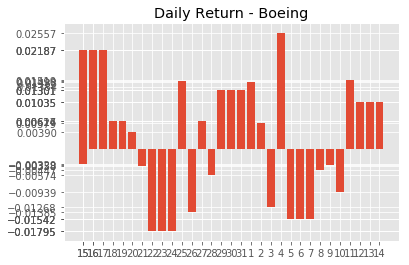

In [93]:
#Plotting Daily Return
daily_return_list=[]
for x in BA_Data_Stock.daily_return:
    daily_return_list.append(x)
print(len(daily_return_list))
day_list=[]
for x in BA_Data_Stock.Day:
    day_list.append(x)
print(len(day_list))
#plt.hist(daily_return_list)
y=day_list
plt.bar(y, height=daily_return_list)
plt.title("Daily Return - Boeing")
plt.xticks(day_list,day_list)
plt.yticks(daily_return_list)
plt.figure.figsize=(50,20)

plt.show()

In [94]:
BA_Data_Stock

Date        High         Low        Open       Close    Volume  \
0   3/15/2019  385.709992  366.450012  370.880005  378.989990  26697700   
1   3/16/2019  385.709992  366.450012  370.880005  378.989990  26697700   
2   3/17/2019  385.709992  366.450012  370.880005  378.989990  26697700   
3   3/18/2019  373.070007  367.200012  370.000000  372.279999  13119200   
4   3/19/2019  378.769989  371.010010  371.140015  373.429993   9856100   
5   3/20/2019  380.799988  373.679993  374.700012  376.160004   8737600   
6   3/21/2019  377.000000  372.230011  374.040008  372.700012   6951000   
7   3/22/2019  369.859985  361.529999  368.790008  362.170013  10143900   
8   3/23/2019  369.859985  361.529999  368.790008  362.170013  10143900   
9   3/24/2019  369.859985  361.529999  368.790008  362.170013  10143900   
10  3/25/2019  371.209992  362.890015  365.000000  370.459992   7939600   
11  3/26/2019  375.600006  367.600006  375.579987  370.380005   6479700   
12  3/27/2019  376.660004  365.549988  371.890015  374.209992   9600000   
13  3/28/2019  376.660004  372.329987  376.600006  374.440002   4921300   
14  3/29/2019  382.179993  374.739990  376.519989  381.420013   7694700   
15  3/30/2019  382.179993  374.739990  376.519989  381.420013   7694700   
16  3/31/2019  382.179993  374.739990  376.519989  381.420013   7694700   
17   4/1/2019  392.899994  383.100006  385.799988  391.540008   7735700   
18   4/2/2019  394.829987  388.500000  388.500000  390.750000   6401000   
19   4/3/2019  391.540008  384.070007  389.679993  384.739990   7350300   
20   4/4/2019  397.059998  385.100006  385.989990  395.859985   9388100   
21   4/5/2019  398.660004  390.950012  398.070007  391.929993   6857200   
22   4/6/2019  398.660004  390.950012  398.070007  391.929993   6857200   
23   4/7/2019  398.660004  390.950012  398.070007  391.929993   6857200   
24   4/8/2019  379.799988  371.859985  376.200012  374.519989  14482600   
25   4/9/2019  372.239990  367.750000  370.290008  369.040008   7980100   
26  4/10/2019  368.790008  362.920013  368.399994  364.940002   8285000   
27  4/11/2019  371.079987  364.209992  364.619995  370.160004   6598400   
28  4/12/2019  379.950012  372.000000  375.750000  379.640015   7334600   
29  4/13/2019  379.950012  372.000000  375.750000  379.640015   7334600   
30  4/14/2019  379.950012  372.000000  375.750000  379.640015   7334600   
31  4/15/2019  377.899994  373.679993  376.700012  375.459992   3822100   
32  4/16/2019  384.640015  375.029999  376.510010  381.720001   7083800   

     Adj Close  Vol_normalized  daily_return Month Day  Year  
0   378.989990        1.000000      0.021867     3  15  2019  
1   378.989990        1.000000      0.021867     3  16  2019  
2   378.989990        1.000000      0.021867     3  17  2019  
3   372.279999        0.406420      0.006162     3  18  2019  
4   373.429993        0.263775      0.006170     3  19  2019  
5   376.160004        0.214880      0.003896     3  20  2019  
6   372.700012        0.136779     -0.003582     3  21  2019  
7   362.170013        0.276356     -0.017951     3  22  2019  
8   362.170013        0.276356     -0.017951     3  23  2019  
9   362.170013        0.276356     -0.017951     3  24  2019  
10  370.459992        0.179995      0.014959     3  25  2019  
11  370.380005        0.116176     -0.013845     3  26  2019  
12  374.209992        0.252579      0.006238     3  27  2019  
13  374.440002        0.048051     -0.005736     3  28  2019  
14  381.420013        0.169290      0.013014     3  29  2019  
15  381.420013        0.169290      0.013014     3  30  2019  
16  381.420013        0.169290      0.013014     3  31  2019  
17  391.540008        0.171082      0.014878     4   1  2019  
18  390.750000        0.112736      0.005792     4   2  2019  
19  384.739990        0.154234     -0.012677     4   3  2019  
20  395.859985        0.243316      0.025571     4   4  2019  
21  391.929993        0.132678     -0.015424     4   5  2019  
22  391.9

In [95]:
BA_Data_Stock = BA_Data_Stock.drop(['Year'],axis=1)
BA_Data_Stock

Date        High         Low        Open       Close    Volume  \
0   3/15/2019  385.709992  366.450012  370.880005  378.989990  26697700   
1   3/16/2019  385.709992  366.450012  370.880005  378.989990  26697700   
2   3/17/2019  385.709992  366.450012  370.880005  378.989990  26697700   
3   3/18/2019  373.070007  367.200012  370.000000  372.279999  13119200   
4   3/19/2019  378.769989  371.010010  371.140015  373.429993   9856100   
5   3/20/2019  380.799988  373.679993  374.700012  376.160004   8737600   
6   3/21/2019  377.000000  372.230011  374.040008  372.700012   6951000   
7   3/22/2019  369.859985  361.529999  368.790008  362.170013  10143900   
8   3/23/2019  369.859985  361.529999  368.790008  362.170013  10143900   
9   3/24/2019  369.859985  361.529999  368.790008  362.170013  10143900   
10  3/25/2019  371.209992  362.890015  365.000000  370.459992   7939600   
11  3/26/2019  375.600006  367.600006  375.579987  370.380005   6479700   
12  3/27/2019  376.660004  365.549988  371.890015  374.209992   9600000   
13  3/28/2019  376.660004  372.329987  376.600006  374.440002   4921300   
14  3/29/2019  382.179993  374.739990  376.519989  381.420013   7694700   
15  3/30/2019  382.179993  374.739990  376.519989  381.420013   7694700   
16  3/31/2019  382.179993  374.739990  376.519989  381.420013   7694700   
17   4/1/2019  392.899994  383.100006  385.799988  391.540008   7735700   
18   4/2/2019  394.829987  388.500000  388.500000  390.750000   6401000   
19   4/3/2019  391.540008  384.070007  389.679993  384.739990   7350300   
20   4/4/2019  397.059998  385.100006  385.989990  395.859985   9388100   
21   4/5/2019  398.660004  390.950012  398.070007  391.929993   6857200   
22   4/6/2019  398.660004  390.950012  398.070007  391.929993   6857200   
23   4/7/2019  398.660004  390.950012  398.070007  391.929993   6857200   
24   4/8/2019  379.799988  371.859985  376.200012  374.519989  14482600   
25   4/9/2019  372.239990  367.750000  370.290008  369.040008   7980100   
26  4/10/2019  368.790008  362.920013  368.399994  364.940002   8285000   
27  4/11/2019  371.079987  364.209992  364.619995  370.160004   6598400   
28  4/12/2019  379.950012  372.000000  375.750000  379.640015   7334600   
29  4/13/2019  379.950012  372.000000  375.750000  379.640015   7334600   
30  4/14/2019  379.950012  372.000000  375.750000  379.640015   7334600   
31  4/15/2019  377.899994  373.679993  376.700012  375.459992   3822100   
32  4/16/2019  384.640015  375.029999  376.510010  381.720001   7083800   

     Adj Close  Vol_normalized  daily_return Month Day  
0   378.989990        1.000000      0.021867     3  15  
1   378.989990        1.000000      0.021867     3  16  
2   378.989990        1.000000      0.021867     3  17  
3   372.279999        0.406420      0.006162     3  18  
4   373.429993        0.263775      0.006170     3  19  
5   376.160004        0.214880      0.003896     3  20  
6   372.700012        0.136779     -0.003582     3  21  
7   362.170013        0.276356     -0.017951     3  22  
8   362.170013        0.276356     -0.017951     3  23  
9   362.170013        0.276356     -0.017951     3  24  
10  370.459992        0.179995      0.014959     3  25  
11  370.380005        0.116176     -0.013845     3  26  
12  374.209992        0.252579      0.006238     3  27  
13  374.440002        0.048051     -0.005736     3  28  
14  381.420013        0.169290      0.013014     3  29  
15  381.420013        0.169290      0.013014     3  30  
16  381.420013        0.169290      0.013014     3  31  
17  391.540008        0.171082      0.014878     4   1  
18  390.750000        0.112736      0.005792     4   2  
19  384.739990        0.154234     -0.012677     4   3  
20  395.859985        0.243316      0.025571     4   4  
21  391.929993        0.132678     -0.015424     4   5  
22  391.929993        0.132678     -0.015424     4   6  
23  391.929993        0.132678     -0.015424     4   7  
24  374.519989        0.466021   

In [96]:
BA_Data_Stock['Day'] = BA_Data_Stock['Day'].astype(int)
BA_Data_Stock['Month'] = BA_Data_Stock['Month'].astype(int)

In [97]:
BA_Data_Stock["1d"] = np.round(BA_Data_Stock["Close"].rolling(window=1,center=False).mean(),2) 

In [98]:
BA_Data_Stock

Date        High         Low        Open       Close    Volume  \
0   3/15/2019  385.709992  366.450012  370.880005  378.989990  26697700   
1   3/16/2019  385.709992  366.450012  370.880005  378.989990  26697700   
2   3/17/2019  385.709992  366.450012  370.880005  378.989990  26697700   
3   3/18/2019  373.070007  367.200012  370.000000  372.279999  13119200   
4   3/19/2019  378.769989  371.010010  371.140015  373.429993   9856100   
5   3/20/2019  380.799988  373.679993  374.700012  376.160004   8737600   
6   3/21/2019  377.000000  372.230011  374.040008  372.700012   6951000   
7   3/22/2019  369.859985  361.529999  368.790008  362.170013  10143900   
8   3/23/2019  369.859985  361.529999  368.790008  362.170013  10143900   
9   3/24/2019  369.859985  361.529999  368.790008  362.170013  10143900   
10  3/25/2019  371.209992  362.890015  365.000000  370.459992   7939600   
11  3/26/2019  375.600006  367.600006  375.579987  370.380005   6479700   
12  3/27/2019  376.660004  365.549988  371.890015  374.209992   9600000   
13  3/28/2019  376.660004  372.329987  376.600006  374.440002   4921300   
14  3/29/2019  382.179993  374.739990  376.519989  381.420013   7694700   
15  3/30/2019  382.179993  374.739990  376.519989  381.420013   7694700   
16  3/31/2019  382.179993  374.739990  376.519989  381.420013   7694700   
17   4/1/2019  392.899994  383.100006  385.799988  391.540008   7735700   
18   4/2/2019  394.829987  388.500000  388.500000  390.750000   6401000   
19   4/3/2019  391.540008  384.070007  389.679993  384.739990   7350300   
20   4/4/2019  397.059998  385.100006  385.989990  395.859985   9388100   
21   4/5/2019  398.660004  390.950012  398.070007  391.929993   6857200   
22   4/6/2019  398.660004  390.950012  398.070007  391.929993   6857200   
23   4/7/2019  398.660004  390.950012  398.070007  391.929993   6857200   
24   4/8/2019  379.799988  371.859985  376.200012  374.519989  14482600   
25   4/9/2019  372.239990  367.750000  370.290008  369.040008   7980100   
26  4/10/2019  368.790008  362.920013  368.399994  364.940002   8285000   
27  4/11/2019  371.079987  364.209992  364.619995  370.160004   6598400   
28  4/12/2019  379.950012  372.000000  375.750000  379.640015   7334600   
29  4/13/2019  379.950012  372.000000  375.750000  379.640015   7334600   
30  4/14/2019  379.950012  372.000000  375.750000  379.640015   7334600   
31  4/15/2019  377.899994  373.679993  376.700012  375.459992   3822100   
32  4/16/2019  384.640015  375.029999  376.510010  381.720001   7083800   

     Adj Close  Vol_normalized  daily_return  Month  Day      1d  
0   378.989990        1.000000      0.021867      3   15  378.99  
1   378.989990        1.000000      0.021867      3   16  378.99  
2   378.989990        1.000000      0.021867      3   17  378.99  
3   372.279999        0.406420      0.006162      3   18  372.28  
4   373.429993        0.263775      0.006170      3   19  373.43  
5   376.160004        0.214880      0.003896      3   20  376.16  
6   372.700012        0.136779     -0.003582      3   21  372.70  
7   362.170013        0.276356     -0.017951      3   22  362.17  
8   362.170013        0.276356     -0.017951      3   23  362.17  
9   362.170013        0.276356     -0.017951      3   24  362.17  
10  370.459992        0.179995      0.014959      3   25  370.46  
11  370.380005        0.116176     -0.013845      3   26  370.38  
12  374.209992        0.252579      0.006238      3   27  374.21  
13  374.440002        0.048051     -0.005736      3   28  374.44  
14  381.420013        0.169290      0.013014      3   29  381.42  
15  381.420013        0.169290      0.013014      3   30  381.42  
16  381.420013        0.169290      0.013014      3   31  381.42  
17  391.540008        0.171082      0.014878      4    1  391.54  
18  390.750000        0.112736      0.005792      4    2  390.75  
19  384.739990        0.154234     -0.012677      4    3  384.74  
20  395.859985        0.243316      0.025571      4

### FEATURE ENGINEERING

In [99]:
#Merging Data to create a Combined Dataframe to apply ML Model.
df3=pd.merge(final_dataset_Tweets,final_dataset_News, how="outer", on=["Month","Day"])

In [100]:
df3

Month  Day                                      Tweet_nonstop  \
0       3   16  {'j': 10, 'p': 10, 'morgan': 2, 'chase': 2, 'a...   
1       3   17  {'michaelkhouw': 4, 'maybe': 6, 'miss': 4, 'so...   
2       3   18  {'litzgerald': 2, 'hammerwielder': 2, 'michael...   
3       3   19  {'todays': 24, 'live': 14, 'trade': 102, 'webi...   
4       3   20  {'look': 28, 'like': 46, 'ba': 1168, 'hold': 3...   
5       3   21  {'ba': 882, 'boeing': 306, 'nasa': 4, 'blast':...   
6       3   22  {'ba': 1136, 'fitchsays': 2, 'boeing': 434, 'm...   
7       3   23  {'boeing': 96, 'ba': 292, 'quote': 2, 'fri': 4...   
8       3   24  {'market': 30, 'mayhem': 2, 'come': 10, 'sign'...   
9       3   25  {'': 89, 'mission': 1, 'abort': 1, 'spy': 58, ...   
10      3   26  {'free': 7, 'video': 6, 'setups': 2, 'mar': 3,...   
11      3   27  {'todays': 8, 'option': 5, 'order': 5, 'flow':...   
12      3   28  {'': 68, 'pump': 3, 'dump': 2, 'ba': 296, 'aap...   
13      3   30  {'ba': 28, 'spx': 4, 'call': 2, 'pay': 2, 'wee...   
14      3   31  {'bull': 2, 'amp': 10, 'bear': 3, 'week': 20, ...   
15      4    1  {'spx': 13, 'futures': 2, 'currently': 2, 'loa...   
16      4    2  {'give': 4, 'minutes': 3, 'wednesday': 2, 'sho...   
17      4    3  {'thestreet': 6, 'jimcramer': 9, 'markatross':...   
18      4    4  {'ba': 722, 'ah': 9, 'good': 15, 'djia': 8, 'd...   
19      4    5  {'one': 12, 'love': 7, 'ba': 658, 'stock': 91,...   
20      4    6  {'ba': 138, 'death': 1, 'max': 16, 'begin': 2,...   
21      4    7  {'canada': 1, 'ba': 136, 'worry': 2, 'straight...   
22      4    8  {'bostongoody': 3, 'redrum': 1, 'ba': 789, 'bo...   
23      4    9  {'april': 7, 'call': 19, 'todays': 12, 'trade'...   
24      4   10  {'ba': 429, 'sure': 3, 'much': 6, 'feed': 5, '...   
25      4   11  {'ba': 378, 'support': 13, 'let': 3, 'see': 12...   
26      4   12  {'todays': 11, 'largest': 2, 'directional': 1,...   
27      4   13  {'ba': 90, 'boeing': 39, 'co': 12, 'morningsta...   
28      4   14  {'top': 3, 'ytd': 1, 'spy': 5, 'since': 4, 'in...   
29      4   15  {'break': 10, 'boeing': 123, 'ba': 251, 'denni...   
30      4   16  {'april': 4, 'call': 23, 'todays': 2, 'trade':...   
31      3   29                                                NaN   

    pos_parity_tweets  neg_parity_tweets  \
0            0.037791           0.052907   
1            0.035678           0.060832   
2            0.035438           0.043871   
3            0.036534           0.042166   
4            0.032925           0.051881   
5            0.032129           0.047390   
6            0.038824           0.046405   
7            0.026059           0.040019   
8            0.029491           0.044504   
9            0.037787           0.030988   
10           0.033427           0.043999   
11           0.030458           0.040223   
12           0.035775           0.033007   
13           0.055794           0.036481   
14           0.021246           0.022191   
15           0.042782           0.034772   
16           0.032783           0.031201   
17           0.036983           0.047158   
18           0.038147           0.049046   
19           0.036654           0.046992   
20           0.031746           0.037999   
21           0.028169           0.044071   
22           0.030977           0.044378   
23           0.032476           0.037911   
24           0.036954           0.045455   
25           0.034648           0.035031   
26           0.042761           0.024161   
27           0.033500           0.034212   
28           0.034997           0.030407   
29           0.036945           0.023799   
30           0.039293           0.024361   
31                NaN                NaN   

                                           BA_nonstop  pos_parity_news  \
0   {'airbus': 1, 'order': 1, 'book': 1, 'shrink':...         0.000000   
1   {'ethiopian': 1, 'airlines': 1, 'black': 1, 'b...         0.000000   
2   {'stock': 17, 'market': 6, 'today': 1, 'fis': .

In [101]:
df4= pd.merge(df3,BA_Data_Stock, how="outer", on=["Month","Day"])

In [102]:
df4

Month  Day                                      Tweet_nonstop  \
0       3   16  {'j': 10, 'p': 10, 'morgan': 2, 'chase': 2, 'a...   
1       3   17  {'michaelkhouw': 4, 'maybe': 6, 'miss': 4, 'so...   
2       3   18  {'litzgerald': 2, 'hammerwielder': 2, 'michael...   
3       3   19  {'todays': 24, 'live': 14, 'trade': 102, 'webi...   
4       3   20  {'look': 28, 'like': 46, 'ba': 1168, 'hold': 3...   
5       3   21  {'ba': 882, 'boeing': 306, 'nasa': 4, 'blast':...   
6       3   22  {'ba': 1136, 'fitchsays': 2, 'boeing': 434, 'm...   
7       3   23  {'boeing': 96, 'ba': 292, 'quote': 2, 'fri': 4...   
8       3   24  {'market': 30, 'mayhem': 2, 'come': 10, 'sign'...   
9       3   25  {'': 89, 'mission': 1, 'abort': 1, 'spy': 58, ...   
10      3   26  {'free': 7, 'video': 6, 'setups': 2, 'mar': 3,...   
11      3   27  {'todays': 8, 'option': 5, 'order': 5, 'flow':...   
12      3   28  {'': 68, 'pump': 3, 'dump': 2, 'ba': 296, 'aap...   
13      3   30  {'ba': 28, 'spx': 4, 'call': 2, 'pay': 2, 'wee...   
14      3   31  {'bull': 2, 'amp': 10, 'bear': 3, 'week': 20, ...   
15      4    1  {'spx': 13, 'futures': 2, 'currently': 2, 'loa...   
16      4    2  {'give': 4, 'minutes': 3, 'wednesday': 2, 'sho...   
17      4    3  {'thestreet': 6, 'jimcramer': 9, 'markatross':...   
18      4    4  {'ba': 722, 'ah': 9, 'good': 15, 'djia': 8, 'd...   
19      4    5  {'one': 12, 'love': 7, 'ba': 658, 'stock': 91,...   
20      4    6  {'ba': 138, 'death': 1, 'max': 16, 'begin': 2,...   
21      4    7  {'canada': 1, 'ba': 136, 'worry': 2, 'straight...   
22      4    8  {'bostongoody': 3, 'redrum': 1, 'ba': 789, 'bo...   
23      4    9  {'april': 7, 'call': 19, 'todays': 12, 'trade'...   
24      4   10  {'ba': 429, 'sure': 3, 'much': 6, 'feed': 5, '...   
25      4   11  {'ba': 378, 'support': 13, 'let': 3, 'see': 12...   
26      4   12  {'todays': 11, 'largest': 2, 'directional': 1,...   
27      4   13  {'ba': 90, 'boeing': 39, 'co': 12, 'morningsta...   
28      4   14  {'top': 3, 'ytd': 1, 'spy': 5, 'since': 4, 'in...   
29      4   15  {'break': 10, 'boeing': 123, 'ba': 251, 'denni...   
30      4   16  {'april': 4, 'call': 23, 'todays': 2, 'trade':...   
31      3   29                                                NaN   
32      3   15                                                NaN   

    pos_parity_tweets  neg_parity_tweets  \
0            0.037791           0.052907   
1            0.035678           0.060832   
2            0.035438           0.043871   
3            0.036534           0.042166   
4            0.032925           0.051881   
5            0.032129           0.047390   
6            0.038824           0.046405   
7            0.026059           0.040019   
8            0.029491           0.044504   
9            0.037787           0.030988   
10           0.033427           0.043999   
11           0.030458           0.040223   
12           0.035775           0.033007   
13           0.055794           0.036481   
14           0.021246           0.022191   
15           0.042782           0.034772   
16           0.032783           0.031201   
17           0.036983           0.047158   
18           0.038147           0.049046   
19           0.036654           0.046992   
20           0.031746           0.037999   
21           0.028169           0.044071   
22           0.030977           0.044378   
23           0.032476           0.037911   
24           0.036954           0.045455   
25           0.034648           0.035031   
26           0.042761           0.024161   
27           0.033500           0.034212   
28           0.034997           0.030407   
29           0.036945           0.023799   
30           0.039293           0.024361   
31                NaN                NaN   
32                NaN                NaN   

                                           BA_nonstop  pos_parity_news  \
0   {'airbus': 1, 'order': 1, 'book': 1, 'shrink':...         0.000000   
1   {'ethiop

In [103]:
temp_datafile_comb=df4[1:31]

In [104]:
temp_datafile_comb

Month  Day                                      Tweet_nonstop  \
1       3   17  {'michaelkhouw': 4, 'maybe': 6, 'miss': 4, 'so...   
2       3   18  {'litzgerald': 2, 'hammerwielder': 2, 'michael...   
3       3   19  {'todays': 24, 'live': 14, 'trade': 102, 'webi...   
4       3   20  {'look': 28, 'like': 46, 'ba': 1168, 'hold': 3...   
5       3   21  {'ba': 882, 'boeing': 306, 'nasa': 4, 'blast':...   
6       3   22  {'ba': 1136, 'fitchsays': 2, 'boeing': 434, 'm...   
7       3   23  {'boeing': 96, 'ba': 292, 'quote': 2, 'fri': 4...   
8       3   24  {'market': 30, 'mayhem': 2, 'come': 10, 'sign'...   
9       3   25  {'': 89, 'mission': 1, 'abort': 1, 'spy': 58, ...   
10      3   26  {'free': 7, 'video': 6, 'setups': 2, 'mar': 3,...   
11      3   27  {'todays': 8, 'option': 5, 'order': 5, 'flow':...   
12      3   28  {'': 68, 'pump': 3, 'dump': 2, 'ba': 296, 'aap...   
13      3   30  {'ba': 28, 'spx': 4, 'call': 2, 'pay': 2, 'wee...   
14      3   31  {'bull': 2, 'amp': 10, 'bear': 3, 'week': 20, ...   
15      4    1  {'spx': 13, 'futures': 2, 'currently': 2, 'loa...   
16      4    2  {'give': 4, 'minutes': 3, 'wednesday': 2, 'sho...   
17      4    3  {'thestreet': 6, 'jimcramer': 9, 'markatross':...   
18      4    4  {'ba': 722, 'ah': 9, 'good': 15, 'djia': 8, 'd...   
19      4    5  {'one': 12, 'love': 7, 'ba': 658, 'stock': 91,...   
20      4    6  {'ba': 138, 'death': 1, 'max': 16, 'begin': 2,...   
21      4    7  {'canada': 1, 'ba': 136, 'worry': 2, 'straight...   
22      4    8  {'bostongoody': 3, 'redrum': 1, 'ba': 789, 'bo...   
23      4    9  {'april': 7, 'call': 19, 'todays': 12, 'trade'...   
24      4   10  {'ba': 429, 'sure': 3, 'much': 6, 'feed': 5, '...   
25      4   11  {'ba': 378, 'support': 13, 'let': 3, 'see': 12...   
26      4   12  {'todays': 11, 'largest': 2, 'directional': 1,...   
27      4   13  {'ba': 90, 'boeing': 39, 'co': 12, 'morningsta...   
28      4   14  {'top': 3, 'ytd': 1, 'spy': 5, 'since': 4, 'in...   
29      4   15  {'break': 10, 'boeing': 123, 'ba': 251, 'denni...   
30      4   16  {'april': 4, 'call': 23, 'todays': 2, 'trade':...   

    pos_parity_tweets  neg_parity_tweets  \
1            0.035678           0.060832   
2            0.035438           0.043871   
3            0.036534           0.042166   
4            0.032925           0.051881   
5            0.032129           0.047390   
6            0.038824           0.046405   
7            0.026059           0.040019   
8            0.029491           0.044504   
9            0.037787           0.030988   
10           0.033427           0.043999   
11           0.030458           0.040223   
12           0.035775           0.033007   
13           0.055794           0.036481   
14           0.021246           0.022191   
15           0.042782           0.034772   
16           0.032783           0.031201   
17           0.036983           0.047158   
18           0.038147           0.049046   
19           0.036654           0.046992   
20           0.031746           0.037999   
21           0.028169           0.044071   
22           0.030977           0.044378   
23           0.032476           0.037911   
24           0.036954           0.045455   
25           0.034648           0.035031   
26           0.042761           0.024161   
27           0.033500           0.034212   
28           0.034997           0.030407   
29           0.036945           0.023799   
30           0.039293           0.024361   

                                           BA_nonstop  pos_parity_news  \
1   {'ethiopian': 1, 'airlines': 1, 'black': 1, 'b...         0.000000   
2   {'stock': 17, 'market': 6, 'today': 1, 'fis': ...         0.035639   
3   {'boeing': 7, 'ba': 1, 'gain': 1, 'market': 2,...         0.019108   
4   {'boeing': 8, 'delay': 2, 'months': 1, 'test':...         0.013423   
5   {'buy': 1, 'boeing': 4, 'aerospace': 1, 'defen...         0.018987   
6   {'us': 4, 'stock': 5, 'movetesla': 1, 'ge': 1,...  

In [105]:
temp_datafile_comb['date_feature']= (temp_datafile_comb['Month']+temp_datafile_comb['Day'])/temp_datafile_comb['Month']
temp_datafile_comb

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Month  Day                                      Tweet_nonstop  \
1       3   17  {'michaelkhouw': 4, 'maybe': 6, 'miss': 4, 'so...   
2       3   18  {'litzgerald': 2, 'hammerwielder': 2, 'michael...   
3       3   19  {'todays': 24, 'live': 14, 'trade': 102, 'webi...   
4       3   20  {'look': 28, 'like': 46, 'ba': 1168, 'hold': 3...   
5       3   21  {'ba': 882, 'boeing': 306, 'nasa': 4, 'blast':...   
6       3   22  {'ba': 1136, 'fitchsays': 2, 'boeing': 434, 'm...   
7       3   23  {'boeing': 96, 'ba': 292, 'quote': 2, 'fri': 4...   
8       3   24  {'market': 30, 'mayhem': 2, 'come': 10, 'sign'...   
9       3   25  {'': 89, 'mission': 1, 'abort': 1, 'spy': 58, ...   
10      3   26  {'free': 7, 'video': 6, 'setups': 2, 'mar': 3,...   
11      3   27  {'todays': 8, 'option': 5, 'order': 5, 'flow':...   
12      3   28  {'': 68, 'pump': 3, 'dump': 2, 'ba': 296, 'aap...   
13      3   30  {'ba': 28, 'spx': 4, 'call': 2, 'pay': 2, 'wee...   
14      3   31  {'bull': 2, 'amp': 10, 'bear': 3, 'week': 20, ...   
15      4    1  {'spx': 13, 'futures': 2, 'currently': 2, 'loa...   
16      4    2  {'give': 4, 'minutes': 3, 'wednesday': 2, 'sho...   
17      4    3  {'thestreet': 6, 'jimcramer': 9, 'markatross':...   
18      4    4  {'ba': 722, 'ah': 9, 'good': 15, 'djia': 8, 'd...   
19      4    5  {'one': 12, 'love': 7, 'ba': 658, 'stock': 91,...   
20      4    6  {'ba': 138, 'death': 1, 'max': 16, 'begin': 2,...   
21      4    7  {'canada': 1, 'ba': 136, 'worry': 2, 'straight...   
22      4    8  {'bostongoody': 3, 'redrum': 1, 'ba': 789, 'bo...   
23      4    9  {'april': 7, 'call': 19, 'todays': 12, 'trade'...   
24      4   10  {'ba': 429, 'sure': 3, 'much': 6, 'feed': 5, '...   
25      4   11  {'ba': 378, 'support': 13, 'let': 3, 'see': 12...   
26      4   12  {'todays': 11, 'largest': 2, 'directional': 1,...   
27      4   13  {'ba': 90, 'boeing': 39, 'co': 12, 'morningsta...   
28      4   14  {'top': 3, 'ytd': 1, 'spy': 5, 'since': 4, 'in...   
29      4   15  {'break': 10, 'boeing': 123, 'ba': 251, 'denni...   
30      4   16  {'april': 4, 'call': 23, 'todays': 2, 'trade':...   

    pos_parity_tweets  neg_parity_tweets  \
1            0.035678           0.060832   
2            0.035438           0.043871   
3            0.036534           0.042166   
4            0.032925           0.051881   
5            0.032129           0.047390   
6            0.038824           0.046405   
7            0.026059           0.040019   
8            0.029491           0.044504   
9            0.037787           0.030988   
10           0.033427           0.043999   
11           0.030458           0.040223   
12           0.035775           0.033007   
13           0.055794           0.036481   
14           0.021246           0.022191   
15           0.042782           0.034772   
16           0.032783           0.031201   
17           0.036983           0.047158   
18           0.038147           0.049046   
19           0.036654           0.046992   
20           0.031746           0.037999   
21           0.028169           0.044071   
22           0.030977           0.044378   
23           0.032476           0.037911   
24           0.036954           0.045455   
25           0.034648           0.035031   
26           0.042761           0.024161   
27           0.033500           0.034212   
28           0.034997           0.030407   
29           0.036945           0.023799   
30           0.039293           0.024361   

                                           BA_nonstop  pos_parity_news  \
1   {'ethiopian': 1, 'airlines': 1, 'black': 1, 'b...         0.000000   
2   {'stock': 17, 'market': 6, 'today': 1, 'fis': ...         0.035639   
3   {'boeing': 7, 'ba': 1, 'gain': 1, 'market': 2,...         0.019108   
4   {'boeing': 8, 'delay': 2, 'months': 1, 'test':...         0.013423   
5   {'buy': 1, 'boeing': 4, 'aerospace': 1, 'defen...         0.018987   
6   {'us': 4, 'stock': 5, 'movetesla': 1, 'ge': 1,...  

In [106]:
temp_datafile_comb=temp_datafile_comb.drop(["Month","Day","Tweet_nonstop","BA_nonstop","High","Low","Open","Volume","Adj Close"], axis=1)

In [107]:
temp_datafile_comb

pos_parity_tweets  neg_parity_tweets  pos_parity_news  neg_parity_news  \
1            0.035678           0.060832         0.000000         0.050000   
2            0.035438           0.043871         0.035639         0.052411   
3            0.036534           0.042166         0.019108         0.031847   
4            0.032925           0.051881         0.013423         0.073826   
5            0.032129           0.047390         0.018987         0.063291   
6            0.038824           0.046405         0.052174         0.086957   
7            0.026059           0.040019         0.011765         0.117647   
8            0.029491           0.044504         0.000000         0.166667   
9            0.037787           0.030988         0.039062         0.101562   
10           0.033427           0.043999         0.030303         0.090909   
11           0.030458           0.040223         0.020833         0.055556   
12           0.035775           0.033007         0.035088         0.070175   
13           0.055794           0.036481         0.136364         0.022727   
14           0.021246           0.022191         0.000000         0.133333   
15           0.042782           0.034772         0.035461         0.042553   
16           0.032783           0.031201         0.072368         0.052632   
17           0.036983           0.047158         0.026022         0.044610   
18           0.038147           0.049046         0.015936         0.039841   
19           0.036654           0.046992         0.046784         0.058480   
20           0.031746           0.037999         0.053191         0.085106   
21           0.028169           0.044071         0.000000         0.250000   
22           0.030977           0.044378         0.018667         0.064000   
23           0.032476           0.037911         0.019324         0.111111   
24           0.036954           0.045455         0.040741         0.040741   
25           0.034648           0.035031         0.029851         0.000000   
26           0.042761           0.024161         0.031496         0.015748   
27           0.033500           0.034212         0.066667         0.133333   
28           0.034997           0.030407         0.100000         0.066667   
29           0.036945           0.023799         0.048128         0.080214   
30           0.039293           0.024361         0.043103         0.034483   

         Date       Close  Vol_normalized  daily_return      1d  date_feature  
1   3/17/2019  378.989990        1.000000      0.021867  378.99      6.666667  
2   3/18/2019  372.279999        0.406420      0.006162  372.28      7.000000  
3   3/19/2019  373.429993        0.263775      0.006170  373.43      7.333333  
4   3/20/2019  376.160004        0.214880      0.003896  376.16      7.666667  
5   3/21/2019  372.700012        0.136779     -0.003582  372.70      8.000000  
6   3/22/2019  362.170013        0.276356     -0.017951  362.17      8.333333  
7   3/23/2019  362.170013        0.276356     -0.017951  362.17      8.666667  
8   3/24/2019  362.170013        0.276356     -0.017951  362.17      9.000000  
9   3/25/2019  370.459992        0.179995      0.014959  370.46      9.333333  
10  3/26/2019  370.380005        0.116176     -0.013845  370.38      9.666667  
11  3/27/2019  374.209992        0.252579      0.006238  374.21     10.000000  
12  3/28/2019  374.440002        0.048051     -0.005736  374.44     10.333333  
13  3/30/2019  381.420013        0.169290      0.013014  381.42     11.000000  
14  3/31/2019  381.420013        0.169290      0.013014  381.42     11.333333  
15   4/1/2019  391.540008        0.171082      0.014878  391.54      1.250000  
16   4/2/2019  390.750000        0.112736      0.005792  390.75      1.500000  
17   4/3/2019  384.739990        0.154234     -0.012677  384.74      1.750000  
18   4/4/2019  395.859985        0.243316      0.025571  395.86      2.000000  
19   4/5/2019  391.929993        0.132678     -0.015424  391.93  

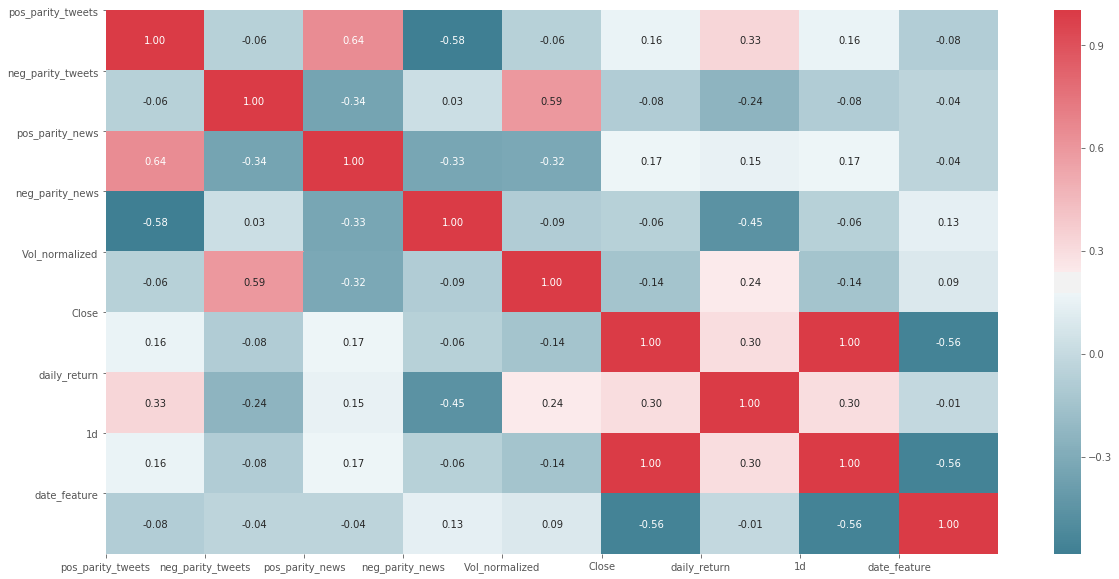

In [166]:
#Heat map to show correlation between attributes of the combined Dataframe.
fig, ax = plt.subplots(figsize=(20, 10))
corr1 = temp_datafile_comb[['pos_parity_tweets','neg_parity_tweets','pos_parity_news','neg_parity_news','Vol_normalized', 'Close','daily_return','1d','date_feature']].corr()
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr1,cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr1.columns)), corr1.columns,rotation=0)
plt.yticks(range(len(corr1.columns)), corr1.columns,rotation=0)
plt.show()

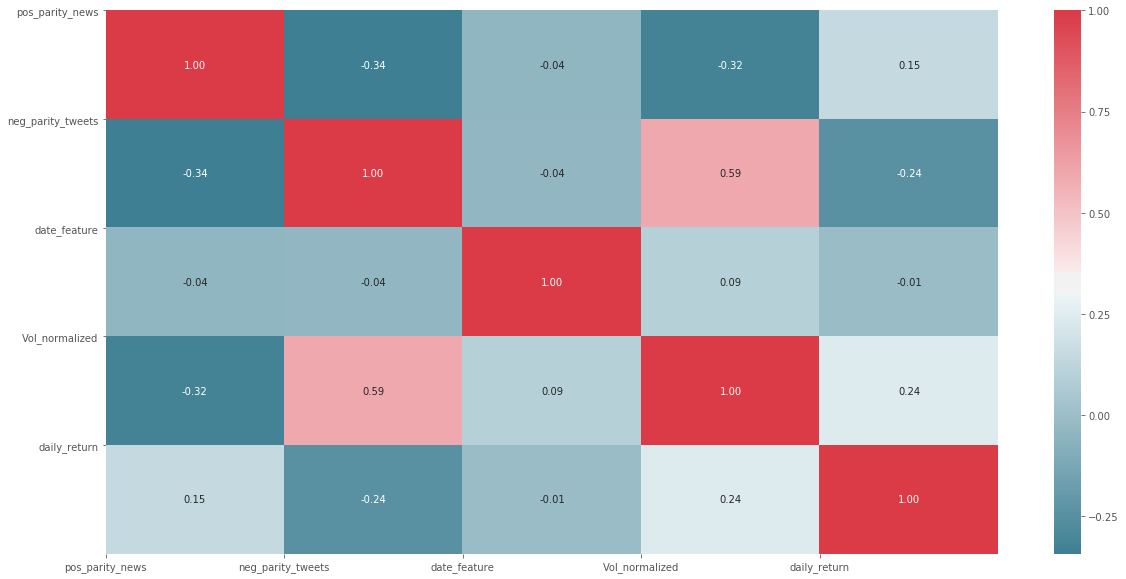

In [109]:
#Heat map to show correlation between significant attributes of the combined Dataframe.
fig, ax = plt.subplots(figsize=(20, 10))
corr = temp_datafile_comb[['pos_parity_news','neg_parity_tweets','date_feature','Vol_normalized','daily_return']].corr()
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns,rotation=0)
plt.yticks(range(len(corr.columns)), corr.columns,rotation=0)
plt.show()

### APPLIED ML

In [110]:
#Applying Simple Linear Regression Model

In [111]:
comb_model1 = sm.ols(formula="Close ~  pos_parity_news +  neg_parity_tweets + date_feature+Vol_normalized+ daily_return", data=temp_datafile_comb).fit()

In [112]:
comb_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     3.771
Date:                Sun, 21 Apr 2019   Prob (F-statistic):             0.0116
Time:                        21:48:23   Log-Likelihood:                -101.04
No. Observations:                  30   AIC:                             214.1
Df Residuals:                      24   BIC:                             222.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           381.6696      9.012     42.352      0.000     363.070     400.269
pos_parity_news      22.1295     53.731      0.412      0.684     -88.766     133.025
neg_parity_tweets   174.5244    230.280      0.758      0.456    -300.751     649.799
date_feature         -1.5568      0.463     -3.360      0.003      -2.513      -0.601
Vol_normalized      -14.1817     12.331     -1.150      0.261     -39.632      11.269
daily_return        280.4989    134.030      2.093      0.047       3.874     557.124
==============================================================================
Omnibus:                        0.143   Durbin-Watson:                   0.567
Prob(Omnibus):                  0.931   Jarque-Bera (JB):                0.039
Skew:                          -0.064   Prob(JB):                        0.981
Kurtosis:                       2.877   Cond. No.                     1.12e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
comb_model1.params

Intercept            381.669620
pos_parity_news       22.129544
neg_parity_tweets    174.524400
date_feature          -1.556765
Vol_normalized       -14.181690
daily_return         280.498869
dtype: float64

In [114]:
model_plot1 = sm.ols(formula="Close ~  pos_parity_news +  neg_parity_tweets + date_feature+ Vol_normalized+ daily_return", data=temp_datafile_comb).fit()
par1 = dict(model_plot1.params)
print(par1) 

{'Intercept': 381.66962021617644, 'pos_parity_news': 22.129543866374433, 'neg_parity_tweets': 174.52439976185428, 'date_feature': -1.5567652137013468, 'Vol_normalized': -14.18168990418576, 'daily_return': 280.4988693564105}


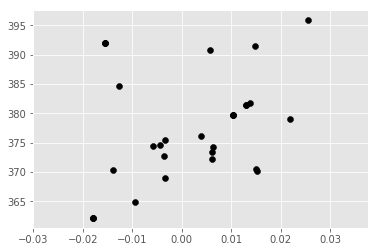

In [115]:
plt.scatter(temp_datafile_comb['daily_return'],temp_datafile_comb['Close'],color='black',label="data")
#plt.scatter(model_plot1['Close'],model_plot1['neg_parity_tweets'],color='black',label="data")
#plt.scatter(model_plot1['Close'],model_plot1['date_feature'],color='black',label="data")
#plt.scatter(model_plot1['Close'],model_plot1['Vol_normalized'],color='black',label="data")
#plt.scatter(model_plot1['Close'],model_plot1['daily_return'],color='black',label="data")

In [116]:
x = temp_datafile_comb['Close']
y1 = par1["Intercept"] + par1['pos_parity_news']*x + par1['neg_parity_tweets']*x+ par1['date_feature']*x+ par1['Vol_normalized']*x+ par1['daily_return']*x
#y2 = par1["Intercept"] + par1['neg_parity_tweets']*x
#y3 = par1["Intercept"] + par1['date_feature']*x
#y4 = par1["Intercept"] + par1['Vol_normalized']*x
#y5 = par1["Intercept"] + par1['daily_return']*x

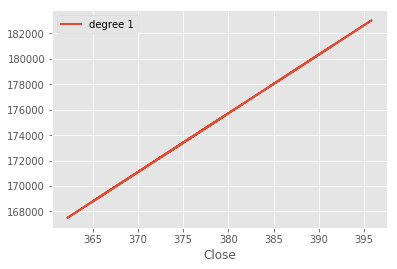

In [117]:
plt.plot(x,y1,label="degree 1",linewidth=2)
#plt.plot(x,y2,label="degree 2",linewidth=2)
#plt.plot(x,y3,label="degree 3",linewidth=2)
#plt.plot(x,y4,label="degree 4",linewidth=2)
#plt.plot(x,y5,label="degree 5",linewidth=2)
#plt.plot(x,y6,label="degree 6",linewidth=2)
plt.legend()
plt.xlabel('Close')
#plt.ylim((0,50))
plt.show()

In [118]:
#Applying Linear Regressor

In [158]:
X_x=temp_datafile_comb[['neg_parity_tweets','pos_parity_news','Vol_normalized', 'daily_return','date_feature']]
Y_y=temp_datafile_comb['Close']

In [159]:
# Train-Test Split for Cross Validation
X_train, X_test, y_train, y_test = train_test_split(X_x, Y_y, test_size=0.3, random_state=0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
#print(metrics.accuracy_score(y_true=y_test, y_pred= y_pred))
#scores = cross_val_score(estimator=regressor, X=X_test, y=y_test, cv=10, scoring='accuracy')
#print(scores)

In [160]:
y_pred = regressor.predict(X_test)
print('Linear Regression R squared": %.4f' % regressor.score(X_test, y_test))

Linear Regression R squared": -1.1208


In [161]:
print('Coefficients: \n', regressor.coef_)
regressor.get_params()

Coefficients: 
 [373.86506234  91.00652171 -16.34397654 315.22172074  -2.31164619]


{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

In [164]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(verbose=0)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [165]:
print('Random Forest R squared": %.4f' % forest_reg.score(X_test, y_test))

Random Forest R squared": 0.6104
